In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array
import os
import sys
import ROOT
from Plot_func import Plot_prof_InRot
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
import sys 
import os
sys.path.append(os.path.abspath("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/"))
from fastSimulation import *

Welcome to JupyROOT 6.26/06


Info in <TUnixSystem::ACLiC>: creating shared library /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/fastSimulation_cxx.so
Warning in cling::IncrementalParser::CheckABICompatibility():
  Possible C++ standard library mismatch, compiled with __GLIBCXX__ '20220324'
  Extraction of runtime standard library version was: '20220421'
In file included from /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/fastSimulation_cxx_ACLiC_dict.cxx:41:
/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/fastSimulation.cxx: In member function ‘int fastParticle::reconstructParticleFull(fastGeometry&, long int, uint)’:
/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/fastSimulation.cxx:1801:9: warning: comparison of integer expressions of different signedness: ‘int’ and ‘uint’ {aka ‘unsigned int’} [-Wsign-compare]
 1801 |     if(l<index1-s

# Reading the files

In [2]:
folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/"
Recotype = "FullRecoInteraction"
ParamType = "InRot"
Particletype = "_muon"
ParamStType = ""
if(ParamType=="InRot") : ParamStType = "NoRot"

sample = "Rangetest_"
inputData = folder+Recotype+"/fastParticle.list"
ROOT.initTreeFast(inputData)
tree = ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root


## ALICE Reconstruction residuals

 FCN=128.696 FROM MIGRAD    STATUS=CONVERGED     367 CALLS         368 TOTAL
                     EDM=3.43901e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     5.08179e+01   8.42246e-01  -7.11955e-03   2.79008e-04
   2  #mu_{core}   1.17593e-03   3.83059e-04   3.77417e-06   6.63563e+01
   3  #sigma_{core}   2.59250e-02   4.48388e-04  -7.45295e-05  -3.69002e+00
   4  A_{tail}     2.40600e+01   6.59065e-01   3.51717e-03  -9.53909e-04
   5  #mu_{tail}   5.29030e-03   8.89580e-04  -5.35638e-04   2.43465e+00
   6  #sigma_{tail}   1.38482e-01   4.26040e-03  -6.58109e-04  -1.24212e+00
 FCN=489.127 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.72386e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotALICEResp0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotALICEResp1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotALICEResp2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq3
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotALICEResp3.png has been 

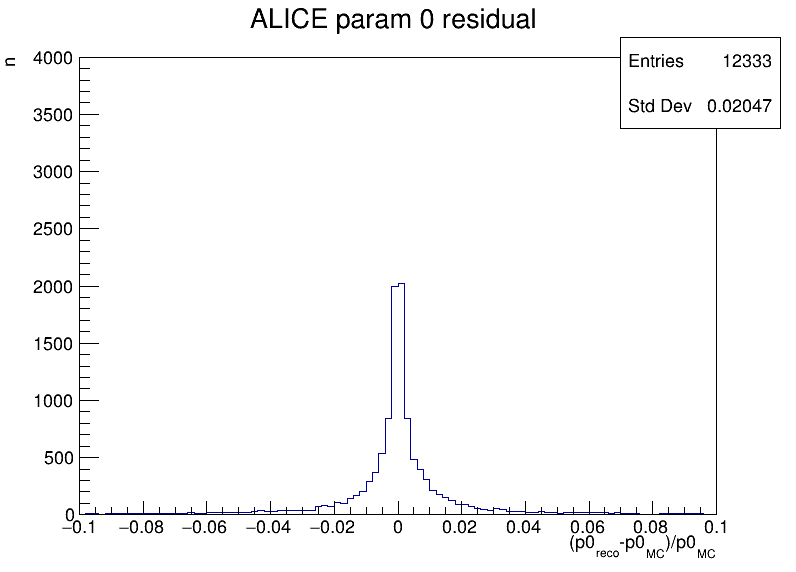

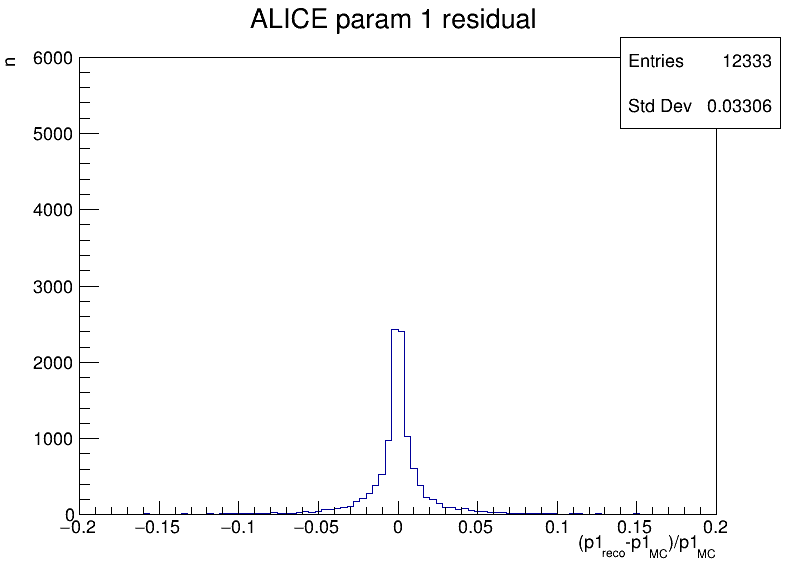

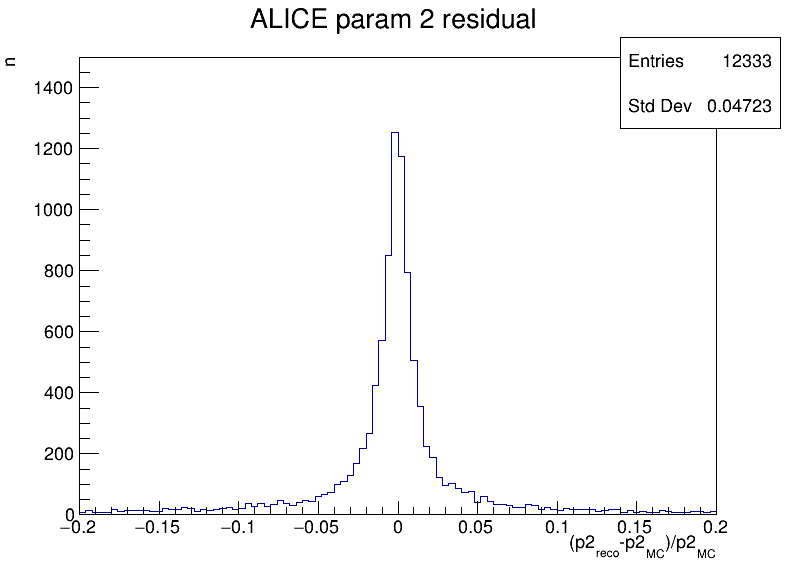

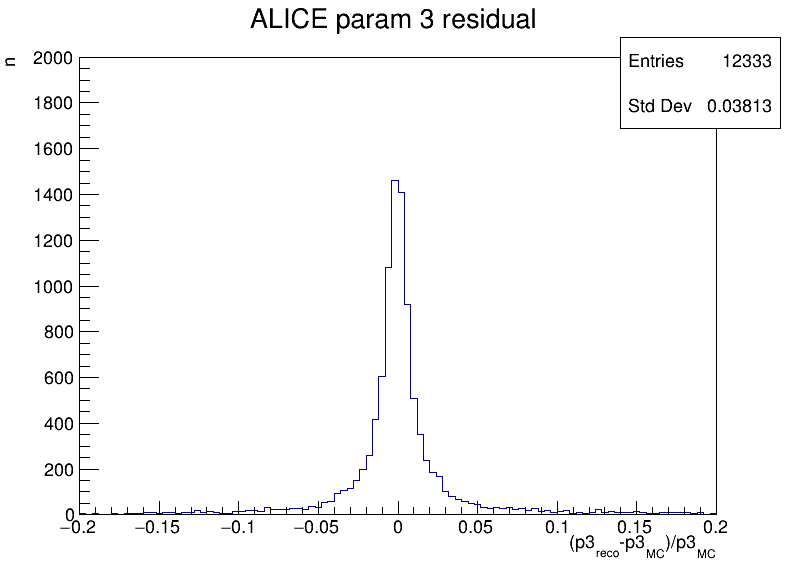

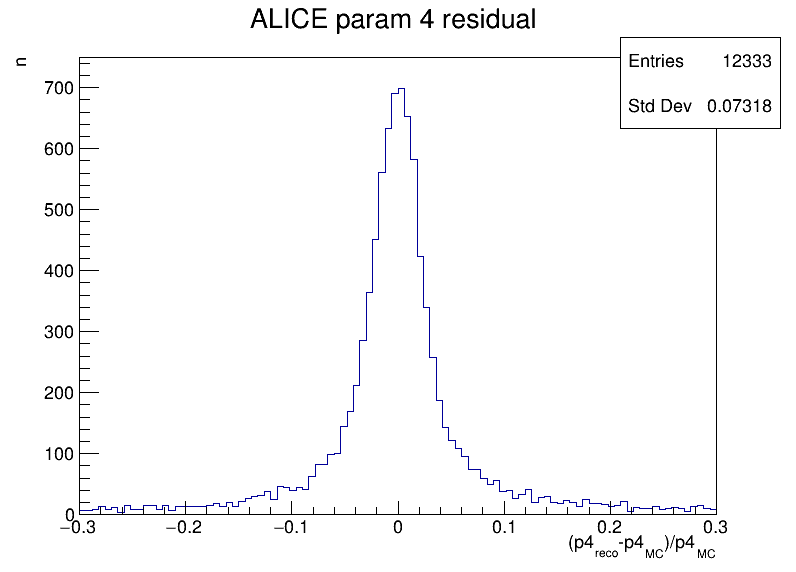

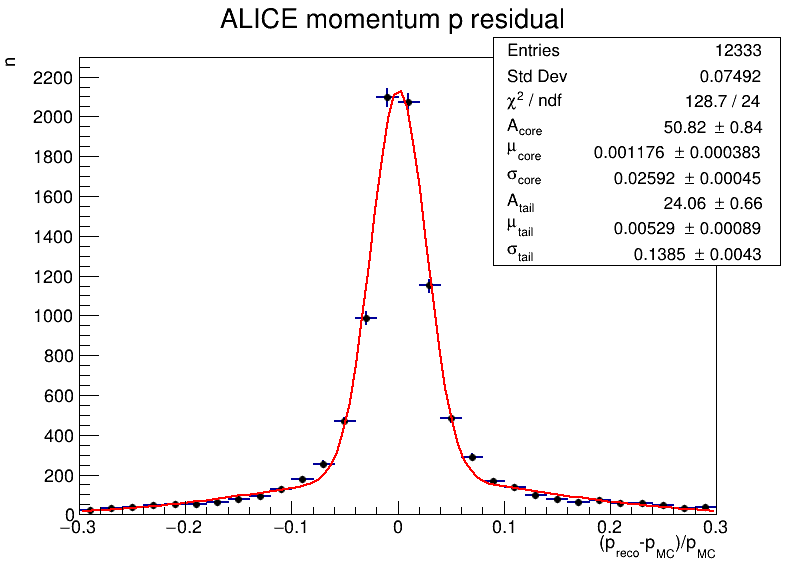

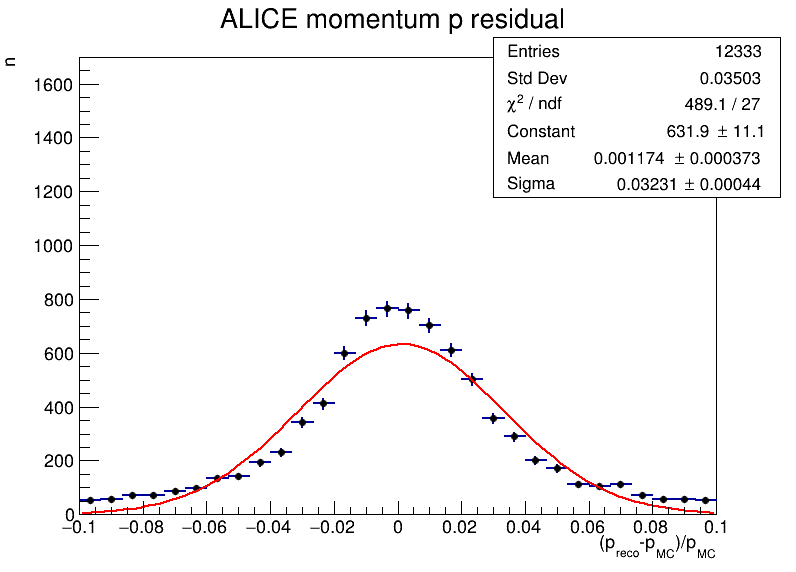

In [10]:
hq0 = ROOT.TCanvas("hq0","hq0",800,600)
tree.Draw("(fParamMC[0].fP[0]-fParam"+ParamType+"[0].fP[0])/fParamMC[0].fP[0]>>htemp0(100,-0.1,0.1)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h0 = ROOT.gPad.GetPrimitive("htemp0")
#h0.GetYaxis().SetRangeUser(0,600) #pgun
h0.GetYaxis().SetRangeUser(0,4000)
h0.SetTitle("ALICE param 0 residual;(p0_{reco}-p0_{MC})/p0_{MC};n")
hq0.Draw()
hq0.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp0.png")

hq1 = ROOT.TCanvas("hq1","hq1",800,600)
tree.Draw("(fParamMC[0].fP[1]-fParam"+ParamType+"[0].fP[1])/fParamMC[0].fP[1]>>htemp1(100,-0.2,0.2)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h1 = ROOT.gPad.GetPrimitive("htemp1")
#h1.GetYaxis().SetRangeUser(0,420) #pgun
h1.GetYaxis().SetRangeUser(0,6000)
h1.SetTitle("ALICE param 1 residual;(p1_{reco}-p1_{MC})/p1_{MC};n")
hq1.Draw()
hq1.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp1.png")

hq2 = ROOT.TCanvas("hq2","hq2",800,600)
tree.Draw("(fParamMC[0].fP[2]-fParam"+ParamType+"[0].fP[2])/fParamMC[0].fP[2]>>htemp2(100,-0.2,0.2)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h2 = ROOT.gPad.GetPrimitive("htemp2")
h2.SetTitle("ALICE param 2 residual;(p2_{reco}-p2_{MC})/p2_{MC};n")
#h2.GetYaxis().SetRangeUser(0,1500) #pgun
h2.GetYaxis().SetRangeUser(0,1500)
hq2.Draw()
hq2.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp2.png")

hq3 = ROOT.TCanvas("hq3","hq3",800,600)
tree.Draw("(fParamMC[0].fP[3]-fParam"+ParamType+"[0].fP[3])/fParamMC[0].fP[3]>>htemp3(100,-0.2,0.2)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h3 = ROOT.gPad.GetPrimitive("htemp3")
h3.SetTitle("ALICE param 3 residual;(p3_{reco}-p3_{MC})/p3_{MC};n")
#h3.GetYaxis().SetRangeUser(0,1500) #pgun
h3.GetYaxis().SetRangeUser(0,2000)
hq3.Draw()
hq3.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp3.png")

hq4 = ROOT.TCanvas("hq4","hq4",800,600)
tree.Draw("(fParamMC[0].fP[4]-fParam"+ParamType+"[0].fP[4])/fParamMC[0].fP[4]>>htemp4(100,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h4 = ROOT.gPad.GetPrimitive("htemp4")
h4.SetTitle("ALICE param 4 residual;(p4_{reco}-p4_{MC})/p4_{MC};n")
#h4.GetYaxis().SetRangeUser(0,500) #pgun
h4.GetYaxis().SetRangeUser(0,750)
hq4.Draw()
hq4.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp4.png")

ROOT.gStyle.SetOptFit(kTRUE)
ROOT.gStyle.SetOptStat(1010)
hqp = ROOT.TCanvas("hqp","hqp",800,600)
tree.Draw("(fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/fParamMC[0].GetP()>>htempp(30,-0.3,0.3)","fParam"+ParamType+"[0].fP[4]!=0&&fParamMC[0].fP[4]!=0","E")
hp = ROOT.gPad.GetPrimitive("htempp")
hp.SetLineWidth(2)
hp.SetMarkerSize(0.9)
hp.SetMarkerStyle(8)
#hp.GetYaxis().SetRangeUser(0,270) #pgun
hp.GetYaxis().SetRangeUser(0,2300)
#Formula = "0.39894228040143*"+str(hp.GetBinWidth(0))+"*([0]/[2])*(exp(-0.5*((x-[1])/[2])^2)+[3]*exp(-0.5*((x-([1]+[4]))/[5])^2)*([2]/[5]))"
Formula = "([0]/[2]*exp(-0.5*((x-[1])/[2])^2)+[3]/[5]*exp(-0.5*((x-[4])/[5])^2))"
double_gauss = ROOT.TF1("double_gauss",Formula,-0.1,0.1)
double_gauss.SetParNames("A_{core}","#mu_{core}","#sigma_{core}","A_{tail}","#mu_{tail}","#sigma_{tail}",)
double_gauss.SetParameters(hp.GetEntries(),hp.GetMean(),hp.GetRMS(),0.5*hp.GetEntries(),hp.GetRMS(),hp.GetRMS())
double_gauss.SetParLimits(4,-0.05,0.05)
double_gauss.SetParLimits(2,0.01,0.5)
double_gauss.SetParLimits(5,0.01,0.5)
hp.Fit("double_gauss")
hp.SetTitle("ALICE momentum p residual;(p_{reco}-p_{MC})/p_{MC};n")
hqp.Draw()
hqp.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp_doublegaus.png")

ROOT.gStyle.SetOptFit(kTRUE)
hqpg = ROOT.TCanvas("hqpg","hqpg",800,600)
tree.Draw("(fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/fParamMC[0].GetP()>>htempp2(30,-0.1,0.1)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","E")
hp2 = ROOT.gPad.GetPrimitive("htempp2")
hp2.SetLineWidth(2)
hp2.SetMarkerSize(0.9)
hp2.SetMarkerStyle(8)
hp2.GetYaxis().SetRangeUser(0,1700) #pgun
#hp2.GetYaxis().SetRangeUser(0,500)
hp2.Fit("gaus")
hp2.SetTitle("ALICE momentum p residual;(p_{reco}-p_{MC})/p_{MC};n")
hqpg.Draw()
hqpg.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"ALICEResp_gaus.png")

## GArSoft Recounstruction Residuals

 FCN=92.2171 FROM MIGRAD    STATUS=CONVERGED     246 CALLS         247 TOTAL
                     EDM=1.23122e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{core}     5.00409e+01   9.27222e-01   6.51341e-06   1.15134e-02
   2  #mu_{core}   2.35529e-03   4.86570e-04  -3.39836e-07  -5.93288e-02
   3  #sigma_{core}   3.15087e-02   5.80901e-04   3.17134e-05   2.46712e-03
   4  A_{tail}     2.55471e+01   7.53326e-01  -6.66262e-06   8.89655e-03
   5  #mu_{tail}   1.15988e-02   2.96590e-03  -7.84402e-06   2.85029e-02
   6  #sigma_{tail}   1.43311e-01   4.44663e-03   1.63527e-05   3.73570e-03
 FCN=257.535 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=1.15905e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotGArSoftResp0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotGArSoftResp1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotGArSoftResp2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hq3
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotGArSoftResp3.png h

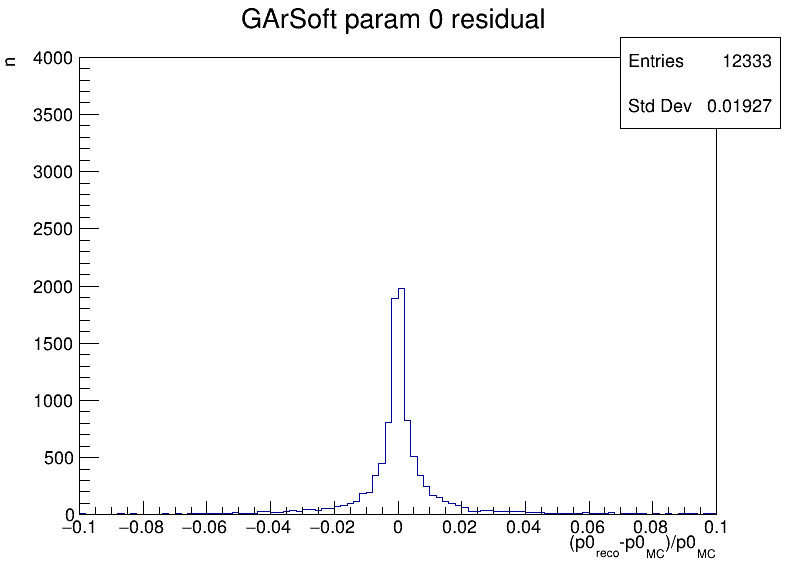

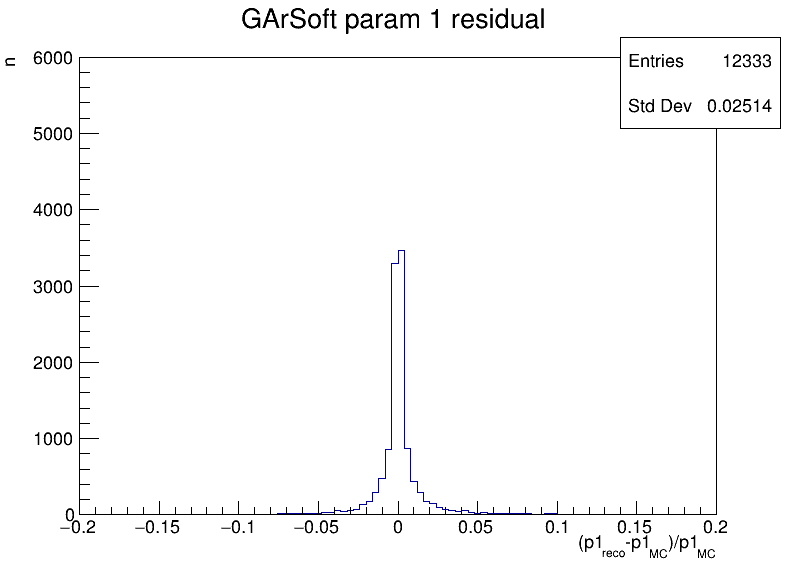

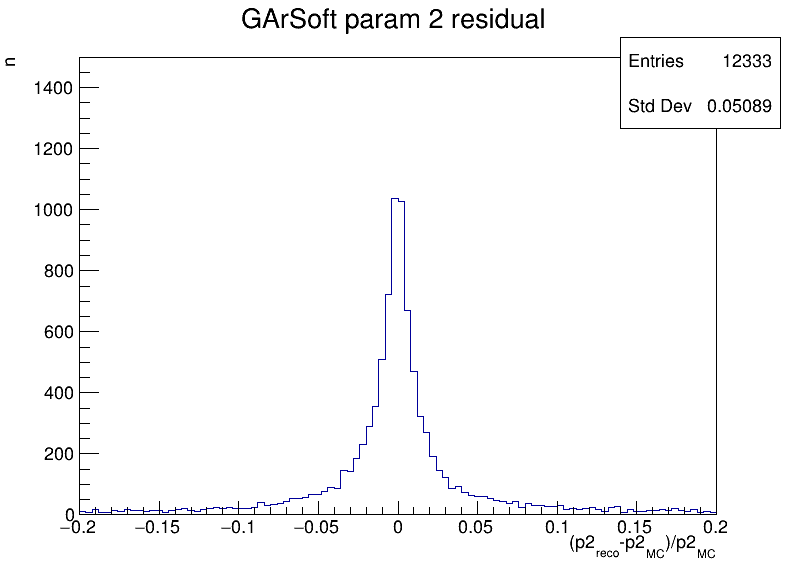

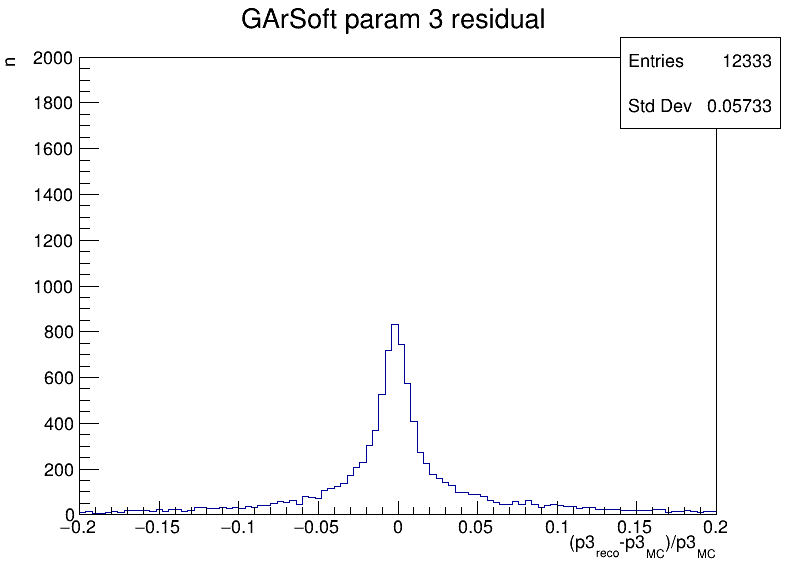

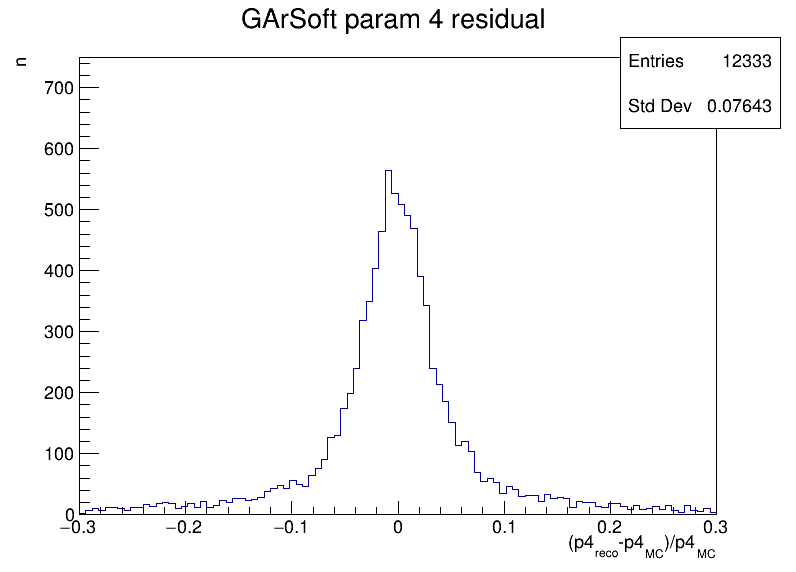

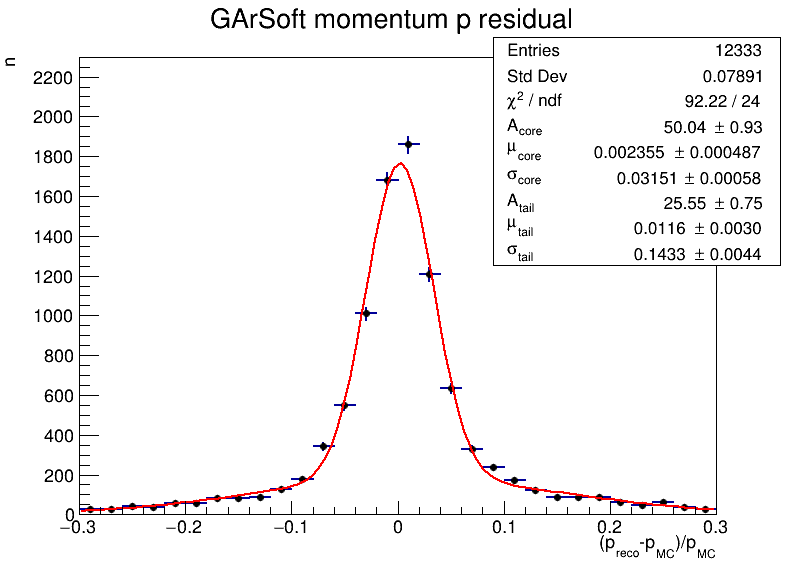

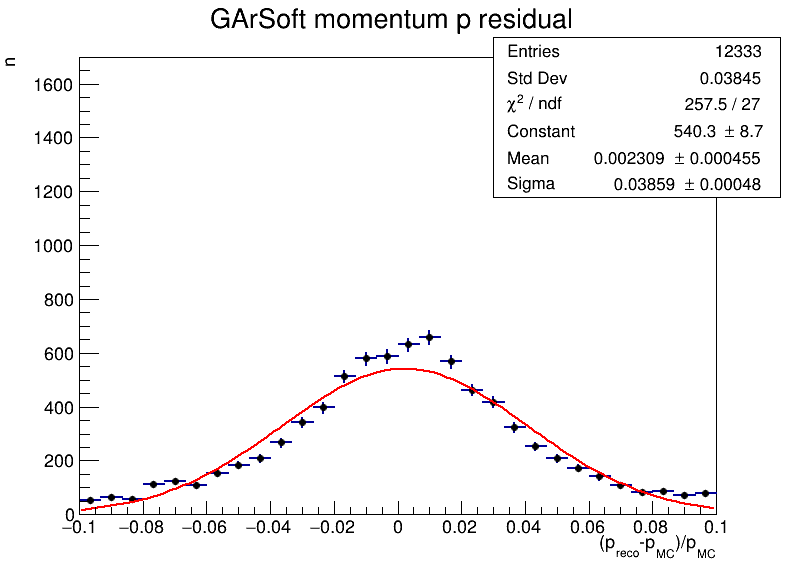

In [11]:
hq0 = ROOT.TCanvas("hq0","hq0",800,600)
tree.Draw("(fParamMC[0].fP[0]-paramSt"+ParamStType+".fP[0])/fParamMC[0].fP[0]>>htemp0(100,-0.1,0.1)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h0 = ROOT.gPad.GetPrimitive("htemp0")
#h0.GetYaxis().SetRangeUser(0,600) #pgun
h0.GetYaxis().SetRangeUser(0,4000)
h0.SetTitle("GArSoft param 0 residual;(p0_{reco}-p0_{MC})/p0_{MC};n")
hq0.Draw()
hq0.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp0.png")

hq1 = ROOT.TCanvas("hq1","hq1",800,600)
tree.Draw("(fParamMC[0].fP[1]-paramSt"+ParamStType+".fP[1])/fParamMC[0].fP[1]>>htemp1(100,-0.2,0.2)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h1 = ROOT.gPad.GetPrimitive("htemp1")
#h1.GetYaxis().SetRangeUser(0,420) #pgun
h1.GetYaxis().SetRangeUser(0,6000)
h1.SetTitle("GArSoft param 1 residual;(p1_{reco}-p1_{MC})/p1_{MC};n")
hq1.Draw()
hq1.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp1.png")

hq2 = ROOT.TCanvas("hq2","hq2",800,600)
tree.Draw("(fParamMC[0].fP[2]-paramSt"+ParamStType+".fP[2])/fParamMC[0].fP[2]>>htemp2(100,-0.2,0.2)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h2 = ROOT.gPad.GetPrimitive("htemp2")
#h2.GetYaxis().SetRangeUser(0,1500) #pgun
h2.GetYaxis().SetRangeUser(0,1500)
h2.SetTitle("GArSoft param 2 residual;(p2_{reco}-p2_{MC})/p2_{MC};n")
hq2.Draw()
hq2.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp2.png")

hq3 = ROOT.TCanvas("hq3","hq3",800,600)
tree.Draw("(fParamMC[0].fP[3]-paramSt"+ParamStType+".fP[3])/fParamMC[0].fP[3]>>htemp3(100,-0.2,0.2)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h3 = ROOT.gPad.GetPrimitive("htemp3")
#h3.GetYaxis().SetRangeUser(0,1500) #pgun
h3.GetYaxis().SetRangeUser(0,2000)
h3.SetTitle("GArSoft param 3 residual;(p3_{reco}-p3_{MC})/p3_{MC};n")
hq3.Draw()
hq3.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp3.png")

hq4 = ROOT.TCanvas("hq4","hq4",800,600)
tree.Draw("(fParamMC[0].fP[4]-paramSt"+ParamStType+".fP[4])/fParamMC[0].fP[4]>>htemp4(100,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
h4 = ROOT.gPad.GetPrimitive("htemp4")
#h4.GetYaxis().SetRangeUser(0,500) #pgun
h4.GetYaxis().SetRangeUser(0,750)
h4.SetTitle("GArSoft param 4 residual;(p4_{reco}-p4_{MC})/p4_{MC};n")
hq4.Draw()
hq4.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp4.png")

ROOT.gStyle.SetOptFit(kTRUE)
ROOT.gStyle.SetOptStat(1010)
hqp = ROOT.TCanvas("hqp","hqp",800,600)
tree.Draw("(fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/fParamMC[0].GetP()>>htempp(30,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","E")
#tree.Draw("(paramSt"+ParamStType+"MC.GetP()-paramSt"+ParamStType+".GetP())/paramSt"+ParamStType+"MC.GetP()>>htempp(30,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&paramSt"+ParamStType+"MC.fP[4]!=0","E")
hp = ROOT.gPad.GetPrimitive("htempp")
#hp.GetYaxis().SetRangeUser(0,270) #pgun
hp.GetYaxis().SetRangeUser(0,2300)
#Formula = "0.39894228040143*"+str(hp.GetBinWidth(0))+"*([0]/[2])*(exp(-0.5*((x-[1])/[2])^2)+[3]*exp(-0.5*((x-([1]+[4]))/[5])^2)*([2]/[5]))"
Formula = "([0]/[2]*exp(-0.5*((x-[1])/[2])^2)+[3]/[5]*exp(-0.5*((x-[4])/[5])^2))"
double_gauss2 = ROOT.TF1("double_gauss2",Formula,-0.3,0.3)
double_gauss2.SetParameters(hp.GetEntries(),hp.GetMean(),hp.GetRMS(),hp.GetEntries(),hp.GetRMS(),hp.GetRMS())
double_gauss2.SetParLimits(0,5,150)
double_gauss2.SetParLimits(3,5,150)
#double_gauss2.SetParLimits(4,-0.05,0.05)
double_gauss2.SetParLimits(2,0.01,0.1)
double_gauss2.SetParLimits(5,0.01,0.5)
double_gauss2.SetParNames("A_{core}","#mu_{core}","#sigma_{core}","A_{tail}","#mu_{tail}","#sigma_{tail}",)
#double_gauss.SetParLimits(0,15000,30000)
#double_gauss.SetParLimits(5,0,1)
hp.SetLineWidth(2)
hp.SetMarkerSize(0.9)
hp.SetMarkerStyle(8)
#double_gauss.SetParLimits(4,-0.05,0.05)
#double_gauss.SetParLimits(2,0,0.1)
hp.Fit("double_gauss2")
hp.SetTitle("GArSoft momentum p residual;(p_{reco}-p_{MC})/p_{MC};n")
hqp.Draw()
hqp.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp_doublegaus.png")

ROOT.gStyle.SetOptFit(kTRUE)
hqpg = ROOT.TCanvas("hqpg","hqpg",800,600)
#tree.Draw("(fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/fParamMC[0].GetP()>>htempp2(30,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","E")
tree.Draw("(fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/fParamMC[0].GetP()>>htempp2(30,-0.1,0.1)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","E")
hp2 = ROOT.gPad.GetPrimitive("htempp2")
hp2.GetYaxis().SetRangeUser(0,1700) #pgun
hp2.SetLineWidth(2)
hp2.SetMarkerSize(0.9)
hp2.SetMarkerStyle(8)
#hp2.GetYaxis().SetRangeUser(0,2500)
hp2.Fit("gaus")
hp2.SetTitle("GArSoft momentum p residual;(p_{reco}-p_{MC})/p_{MC};n")
hqpg.Draw()
hqpg.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"GArSoftResp_gaus.png")

## Resolution and bias as function of variables

### Length

In [5]:
# LengthRange = "350,650"   #For particle gun
# NBins = "12"
# biasrange=[-0.02,0.02]
LengthRange = "0,800"   #Interaction
NBins="16"
biasrange=[-0.1,0.2]
tree.Draw("(part.fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/part.fParamMC[0].GetP():fLength"+ParamType+">>hpkGAr("+NBins+","+LengthRange+",30,-0.5,0.5)","fParam"+ParamType+"[0].fC[14]!=0","colz")
hpkGAr = ROOT.gPad.GetPrimitive("hpkGAr")
hpkGAr.FitSlicesY()
hpkGAr_mean = ROOT.gDirectory.Get("hpkGAr_1")
hpkGAr_sigma = ROOT.gDirectory.Get("hpkGAr_2")
hpkGAr_mean.SetTitle(";Length (cm); #mu(p_{reco}-p_{MC})/p_{MC})")

tree.Draw("(fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/fParamMC[0].GetP():fLength"+ParamType+">>hpk("+NBins+","+LengthRange+",30,-0.5,0.5)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hpk = ROOT.gPad.GetPrimitive("hpk")
hpk.FitSlicesY()
hpk_mean = ROOT.gDirectory.Get("hpk_1")
hpk_mean.SetTitle(";Length (cm); #mu(p_{reco}-p_{MC})/p_{MC})")
hpk_sigma = ROOT.gDirectory.Get("hpk_2")
hpk_sigma.SetTitle(";Length (cm); #sigma(p_{reco}-p_{MC})/p_{MC})")

tree.Draw("fLength"+ParamType+">>hlen(80,"+LengthRange+")","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hlen = ROOT.gPad.GetPrimitive("hlen")
hlen.SetTitle(";Length (cm); n_{ev}")

hpkGAr_sigma.SetMarkerStyle(20)
hpk_sigma.SetMarkerStyle(21)
hpk_sigma.SetMarkerColor(ROOT.kRed)
hpkGAr_mean.SetMarkerStyle(20)
hpk_mean.SetMarkerStyle(21)
hpk_mean.SetMarkerColor(ROOT.kRed)

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (50.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (100.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (150.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (200.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (250.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (300.000000,350.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (350.000000,400.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (400.000000,450.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (450.000000,500.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (500.000000,550.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (550.000000,600.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (600.000000,650.000000)
Info in <TH2F::DoFitSlices>: Sl

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotRespVsLength.png has been created


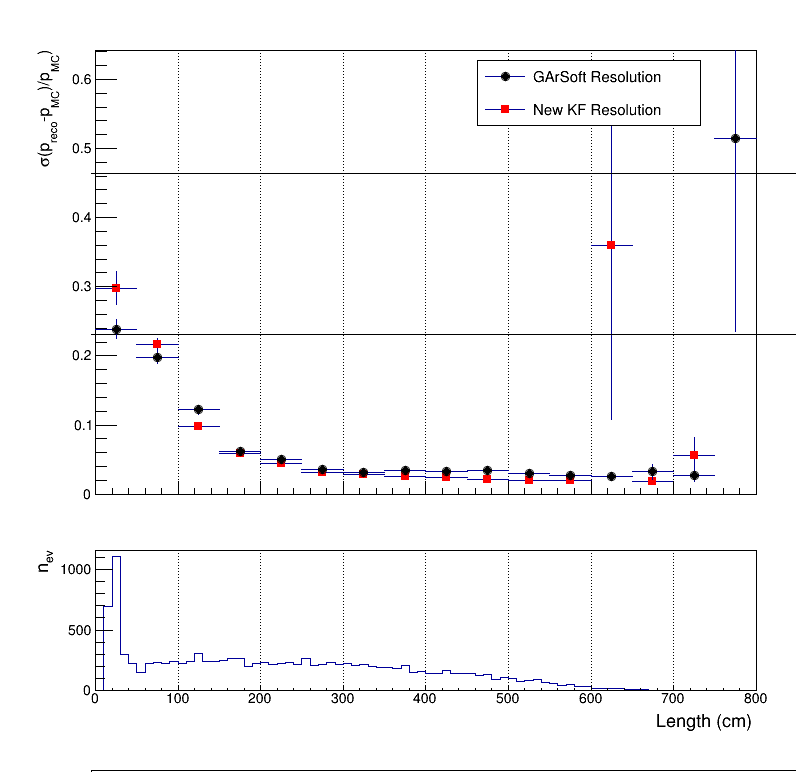

In [6]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpk_sigma.Draw()
hpk_sigma.GetYaxis().SetLabelSize(0.03)
hpk_sigma.GetXaxis().SetLabelSize(0.0)
#hpkGAr_sigma.GetYaxis().SetRangeUser(0.01,0.04)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpkGAr_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hpkGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(hpk_sigma,"New KF Resolution","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go back to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hlen.GetYaxis().SetTitleSize(20)
hlen.GetYaxis().SetTitleFont(43)
hlen.GetYaxis().SetTitleOffset(1.55)
hlen.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hlen.GetYaxis().SetLabelSize(15)
hlen.GetYaxis().SetNdivisions(505)

hlen.GetXaxis().SetTitleSize(20)
hlen.GetXaxis().SetTitleFont(43)
hlen.GetXaxis().SetTitleOffset(1)
hlen.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hlen.GetXaxis().SetLabelSize(15)
hlen.Draw()

hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"RespVsLength.png")





Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotBiaspVsLength.png has been created


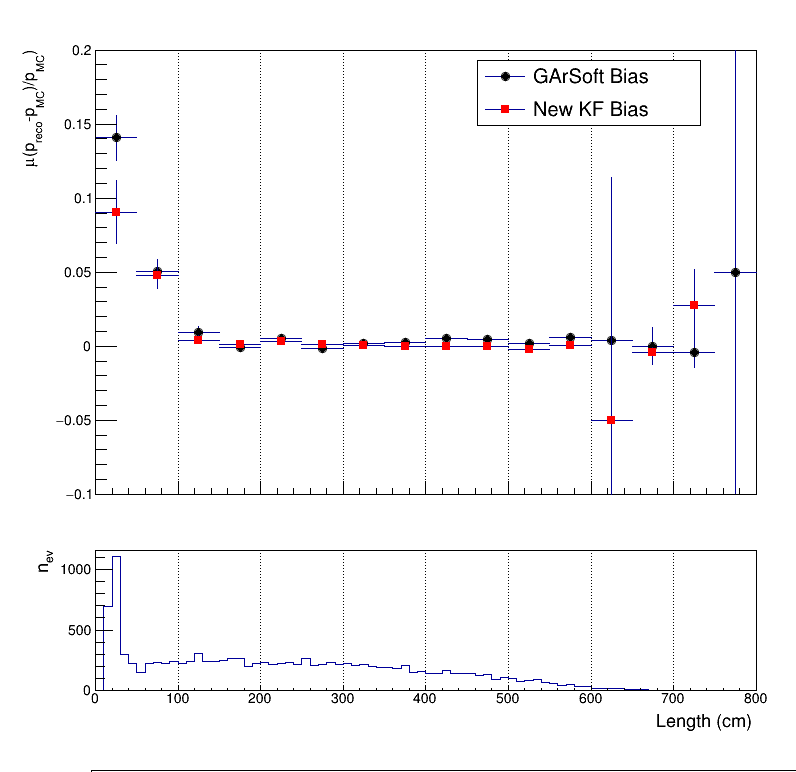

In [7]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpkGAr_mean.Draw()
hpkGAr_mean.GetYaxis().SetRangeUser(biasrange[0],biasrange[1])
hpkGAr_mean.GetYaxis().SetLabelSize(0.03)
hpkGAr_mean.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpk_mean.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hpkGAr_sigma,"GArSoft Bias","pl")
legend.AddEntry(hpk_sigma,"New KF Bias","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go back to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hlen.GetYaxis().SetTitleSize(20)
hlen.GetYaxis().SetTitleFont(43)
hlen.GetYaxis().SetTitleOffset(1.55)
hlen.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hlen.GetYaxis().SetLabelSize(15)
hlen.GetYaxis().SetNdivisions(505)

hlen.GetXaxis().SetTitleSize(20)
hlen.GetXaxis().SetTitleFont(43)
hlen.GetXaxis().SetTitleOffset(1)
hlen.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hlen.GetXaxis().SetLabelSize(15)
hlen.Draw()

hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVsLength.png")

### LArm

In [8]:
# LArmRange = "250,500"  #Particle gun
# NBins = "10"
# biasrange = [-0.02,0.02]
LArmRange = "25,475"  #Interaction
NBins = "18"
biasrange = [-0.05,0.3]

# tree.SetAlias("yend","part.fParamMC[fParamMC@.size()-1].fX*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)+part.fParamMC[fParamMC@.size()-1].fP[0]*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)")
# tree.SetAlias("ystart","part.fParamMC[0].fX*sin(part.fParamMC[0].fAlpha)+part.fParamMC[0].fP[0]*cos(part.fParamMC[0].fAlpha)")
# tree.SetAlias("xend","part.fParamMC[fParamMC@.size()-1].fX*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)-part.fParamMC[fParamMC@.size()-1].fP[0]*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)")
# tree.SetAlias("xstart","part.fParamMC[0].fX*cos(part.fParamMC[0].fAlpha)-part.fParamMC[0].fP[0]*sin(part.fParamMC[0].fAlpha)")
# tree.SetAlias("lArmMC","sqrt((xend-xstart)*(xend-xstart)+(yend-ystart)*(yend-ystart))")
# tree.SetAlias("cond","!(( lArmMC/part.fParamMC@.size()) / (75-part.fParamMC@.size()) < 0.015 && part.fParamMC@.size()<75)")


tree.Draw("(part.fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/part.fParamMC[0].GetP():lArmMC>>hplaGAr("+NBins+","+LArmRange+",60,-0.5,0.5)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0&&cond","colz")
hplaGAr = ROOT.gPad.GetPrimitive("hplaGAr")
hplaGAr.FitSlicesY()
hplaGAr_sigma = ROOT.gDirectory.Get("hplaGAr_2")
hplaGAr_mean = ROOT.gDirectory.Get("hplaGAr_1")
hplaGAr_mean.SetTitle(";LArm (cm); #mu(p_{reco}-p_{MC})/p_{MC})")
#hpkGAr_sigma.SetTitle(";Length (cm); #sigma_{GAr}")

tree.Draw("(fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/fParamMC[0].GetP():lArmMC>>hpla("+NBins+","+LArmRange+",60,-0.5,0.5)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0&&cond","colz")
hpla = ROOT.gPad.GetPrimitive("hpla")
hpla.FitSlicesY()
hpla_sigma = ROOT.gDirectory.Get("hpla_2")
hpla_mean = ROOT.gDirectory.Get("hpla_1")
hpla_sigma.SetTitle(";LArm (cm); #sigma((p_{reco}-p_{MC})/p_{MC})")
hpla_mean.SetTitle(";LArm (cm); #mu(p_{reco}-p_{MC})/p_{MC})")

tree.Draw("lArmMC>>hla(80,"+LArmRange+")","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0&&cond","colz")
hla = ROOT.gPad.GetPrimitive("hla")
hla.SetTitle(";LArm (cm); n_{ev}")

hplaGAr_sigma.SetMarkerStyle(20)
hpla_sigma.SetMarkerStyle(21)
hpla_sigma.SetMarkerColor(ROOT.kRed)
hplaGAr_mean.SetMarkerStyle(20)
hpla_mean.SetMarkerStyle(21)
hpla_mean.SetMarkerColor(ROOT.kRed)

AttributeError: 'TObject' object has no attribute 'FitSlicesY'

Error in <TTreeFormula::Compile>:  Bad numerical expression : "cond"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {(part.fParamMC[0].GetP()-paramStNoRot.GetP())/part.fParamMC[0].GetP():lArmMC,fParamInRot[0].fC[14]!=0&&fParamMC[0].fP[4]!=0&&cond}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotRespVsLArm.png has been created


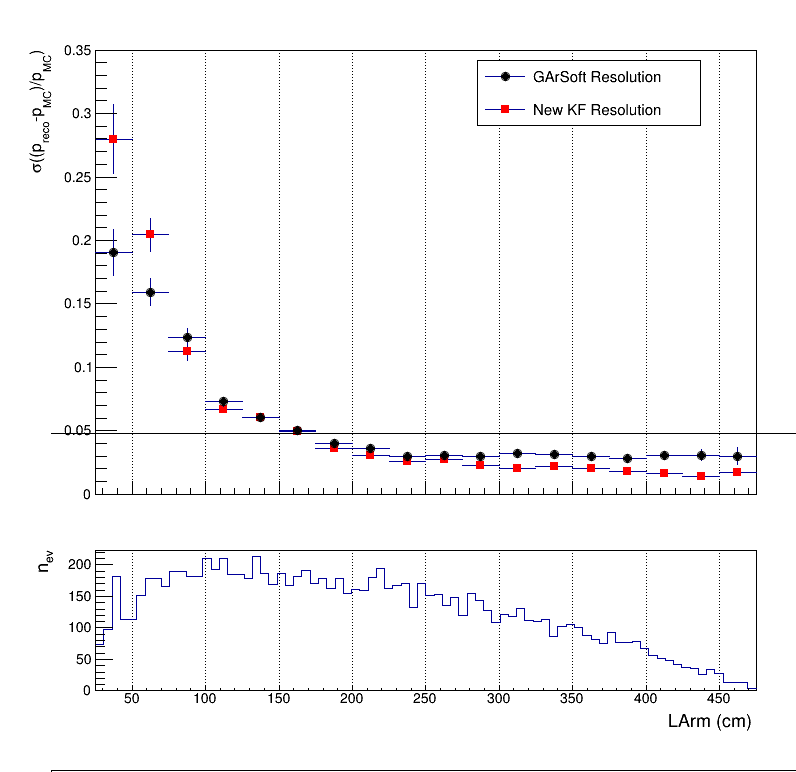

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpla_sigma.Draw()
hpla_sigma.GetYaxis().SetLabelSize(0.03)
hpla_sigma.GetXaxis().SetLabelSize(0.0)
hpla_sigma.GetYaxis().SetRangeUser(0.0,0.35)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hplaGAr_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hplaGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(hpla_sigma,"New KF Resolution","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacla to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hla.GetYaxis().SetTitleSize(20)
hla.GetYaxis().SetTitleFont(43)
hla.GetYaxis().SetTitleOffset(1.55)
hla.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hla.GetYaxis().SetLabelSize(15)
hla.GetYaxis().SetNdivisions(505)

hla.GetXaxis().SetTitleSize(20)
hla.GetXaxis().SetTitleFont(43)
hla.GetXaxis().SetTitleOffset(1)
hla.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hla.GetXaxis().SetLabelSize(15)
hla.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"RespVsLArm.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotBiaspVsLArm.png has been created


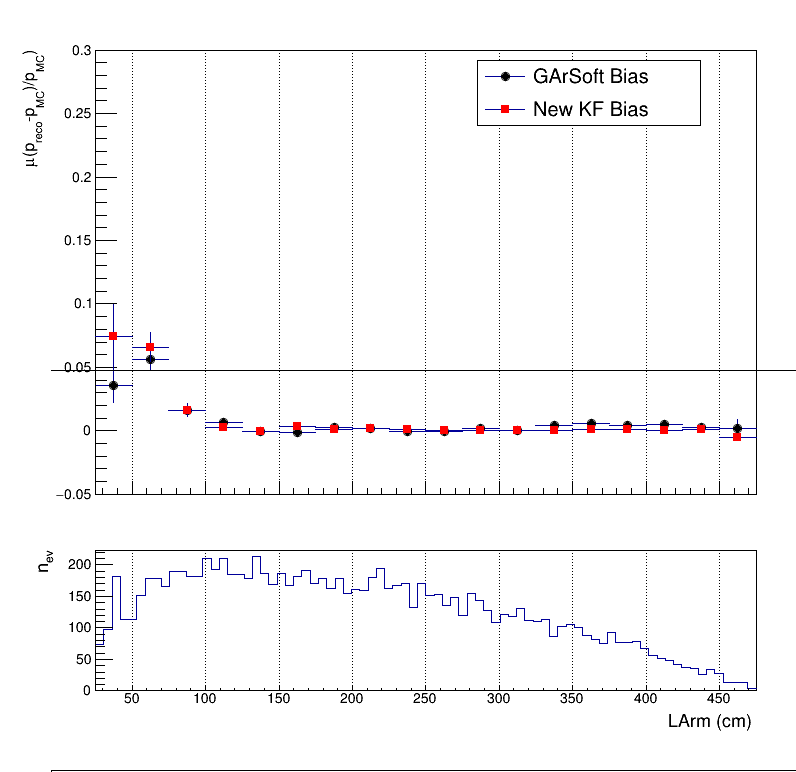

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hplaGAr_mean.Draw()
hplaGAr_mean.GetYaxis().SetRangeUser(biasrange[0],biasrange[1])
hplaGAr_mean.GetYaxis().SetLabelSize(0.03)
hplaGAr_mean.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpla_mean.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hplaGAr_sigma,"GArSoft Bias","pl")
legend.AddEntry(hpla_sigma,"New KF Bias","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacla to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hla.GetYaxis().SetTitleSize(20)
hla.GetYaxis().SetTitleFont(43)
hla.GetYaxis().SetTitleOffset(1.55)
hla.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hla.GetYaxis().SetLabelSize(15)
hla.GetYaxis().SetNdivisions(505)

hla.GetXaxis().SetTitleSize(20)
hla.GetXaxis().SetTitleFont(43)
hla.GetXaxis().SetTitleOffset(1)
hla.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hla.GetXaxis().SetLabelSize(15)
hla.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVsLArm.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq2


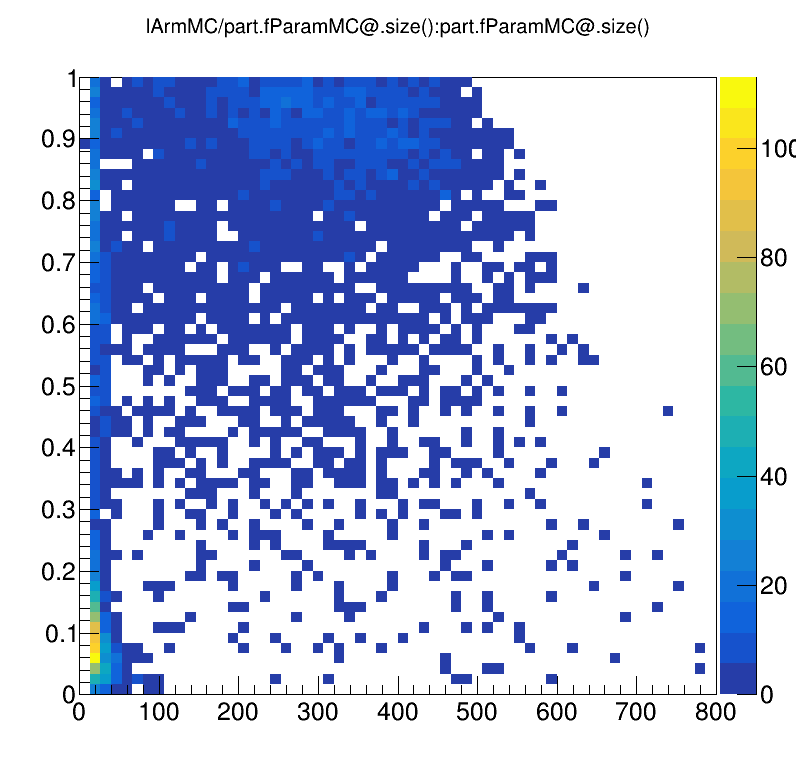

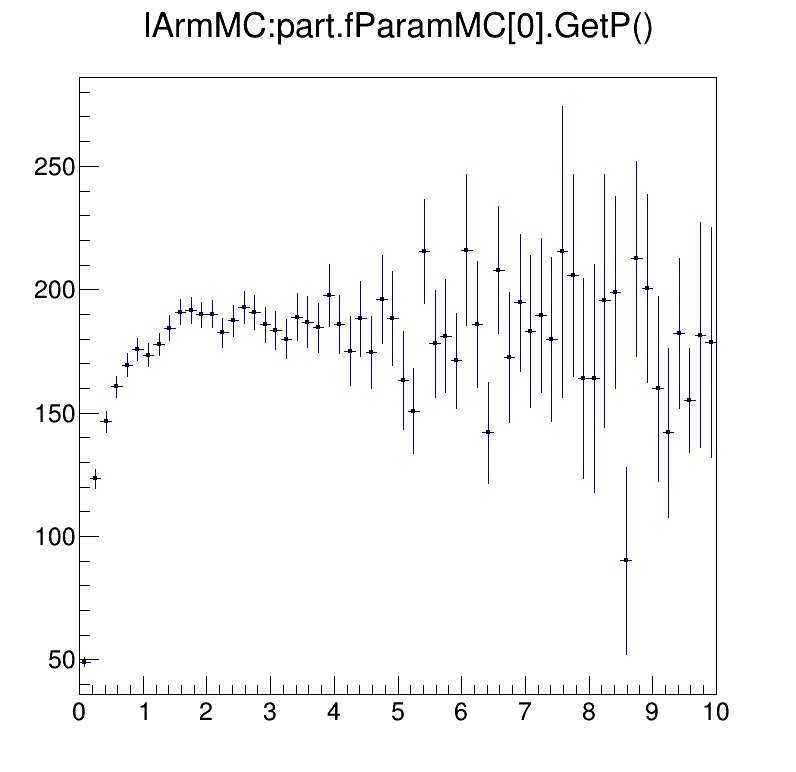

In [ ]:
tree.SetAlias("yend","part.fParamMC[fParamMC@.size()-1].fX*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)+part.fParamMC[fParamMC@.size()-1].fP[0]*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("ystart","part.fParamMC[0].fX*sin(part.fParamMC[0].fAlpha)+part.fParamMC[0].fP[0]*cos(part.fParamMC[0].fAlpha)")
tree.SetAlias("xend","part.fParamMC[fParamMC@.size()-1].fX*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)-part.fParamMC[fParamMC@.size()-1].fP[0]*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("xstart","part.fParamMC[0].fX*cos(part.fParamMC[0].fAlpha)-part.fParamMC[0].fP[0]*sin(part.fParamMC[0].fAlpha)")
tree.SetAlias("lArmMC","sqrt((xend-xstart)*(xend-xstart)+(yend-ystart)*(yend-ystart))")

hqq = ROOT.TCanvas("hqq","hqq",800,800)
tree.Draw("lArmMC/part.fParamMC@.size():part.fParamMC@.size()>>h(60,0,800,60,0,1)","","colz")
hqq.Draw()

hqq2 = ROOT.TCanvas("hqq2","hqq2",800,800)
tree.Draw("lArmMC:part.fParamMC[0].GetP()>>h2(60,0,10,60,0,500)","","prof")
hqq2.Draw()

### NPoints

In [ ]:
# NPointsRange = "100,550" ##Particle Gun
# NBins = "9"
# biasrange = [-0.02,0.02]
NPointsRange = "0,650" ##Interaction
NBins = "13"
biasrange = [-0.05,0.2]
tree.SetAlias("NPoints","part.fParam"+ParamType+"@.size()")


tree.Draw("(part.fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/part.fParamMC[0].GetP():NPoints>>hpnpGAr("+NBins+","+NPointsRange+",50,-0.6,0.6)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hpnpGAr = ROOT.gPad.GetPrimitive("hpnpGAr")
hpnpGAr.FitSlicesY()
hpnpGAr_sigma = ROOT.gDirectory.Get("hpnpGAr_2")
hpnpGAr_mean = ROOT.gDirectory.Get("hpnpGAr_1")
hpnpGAr_mean.SetTitle(";NPoints; #mean((p_{reco}-p_{MC})/p_{MC})")
#hpkGAr_sigma.SetTitle(";Length (cm); #sigma_{GAr}")

tree.Draw("(fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/fParamMC[0].GetP():NPoints>>hpnp("+NBins+","+NPointsRange+",50,-0.6,0.6)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hpnp = ROOT.gPad.GetPrimitive("hpnp")
hpnp.FitSlicesY()
hpnp_sigma = ROOT.gDirectory.Get("hpnp_2")
hpnp_mean = ROOT.gDirectory.Get("hpnp_1")
hpnp_sigma.SetTitle(";LArm (cm); #sigma((p_{reco}-p_{MC})/p_{MC})")

tree.Draw("NPoints>>hnp(80,"+NPointsRange+")","fParam"+ParamType+"[0].fC[14]!=0","colz")
hnp = ROOT.gPad.GetPrimitive("hnp")
hnp.SetTitle(";NPoints; n_{ev}")

hpnpGAr_sigma.SetMarkerStyle(20)
hpnp_sigma.SetMarkerStyle(21)
hpnp_sigma.SetMarkerColor(ROOT.kRed)
hpnpGAr_mean.SetMarkerStyle(20)
hpnp_mean.SetMarkerStyle(21)
hpnp_mean.SetMarkerColor(ROOT.kRed)

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (50.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (100.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (150.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (200.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (250.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (300.000000,350.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (350.000000,400.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (400.000000,450.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (450.000000,500.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (500.000000,550.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (550.000000,600.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (600.000000,650.000000)
Info in <TH2F::DoFitSlices>: Sl

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotRespVSNPoints.png has been created


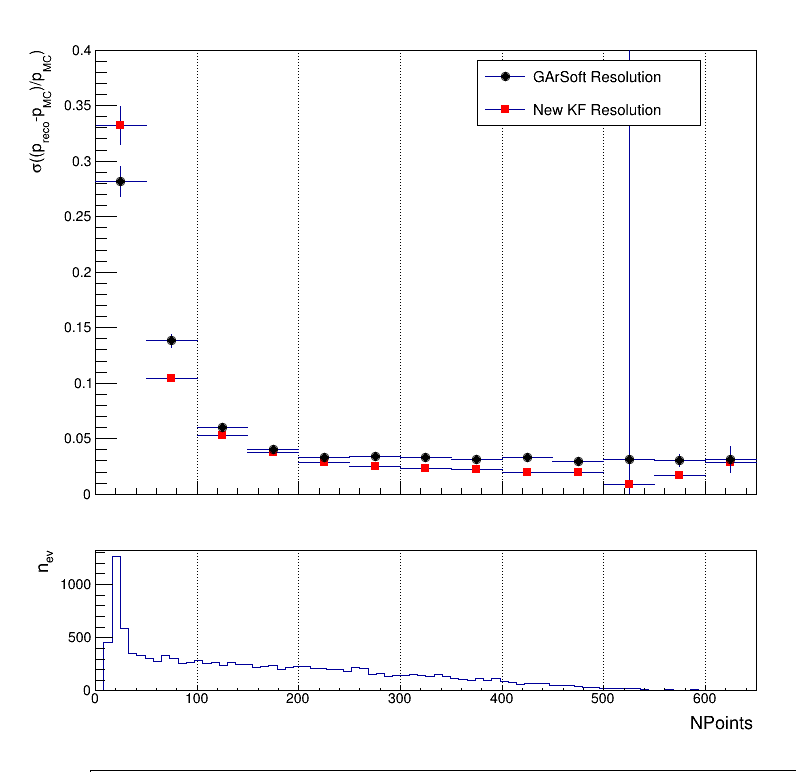

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpnp_sigma.Draw()
hpnp_sigma.GetYaxis().SetLabelSize(0.03)
hpnp_sigma.GetXaxis().SetLabelSize(0.0)
hpnp_sigma.GetYaxis().SetRangeUser(0,0.4)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpnpGAr_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hpnpGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(hpnp_sigma,"New KF Resolution","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacnp to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hnp.GetYaxis().SetTitleSize(20)
hnp.GetYaxis().SetTitleFont(43)
hnp.GetYaxis().SetTitleOffset(1.55)
hnp.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hnp.GetYaxis().SetLabelSize(15)
hnp.GetYaxis().SetNdivisions(505)

hnp.GetXaxis().SetTitleSize(20)
hnp.GetXaxis().SetTitleFont(43)
hnp.GetXaxis().SetTitleOffset(1)
hnp.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hnp.GetXaxis().SetLabelSize(15)
hnp.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"RespVSNPoints.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotBiaspVSNPoints.png has been created


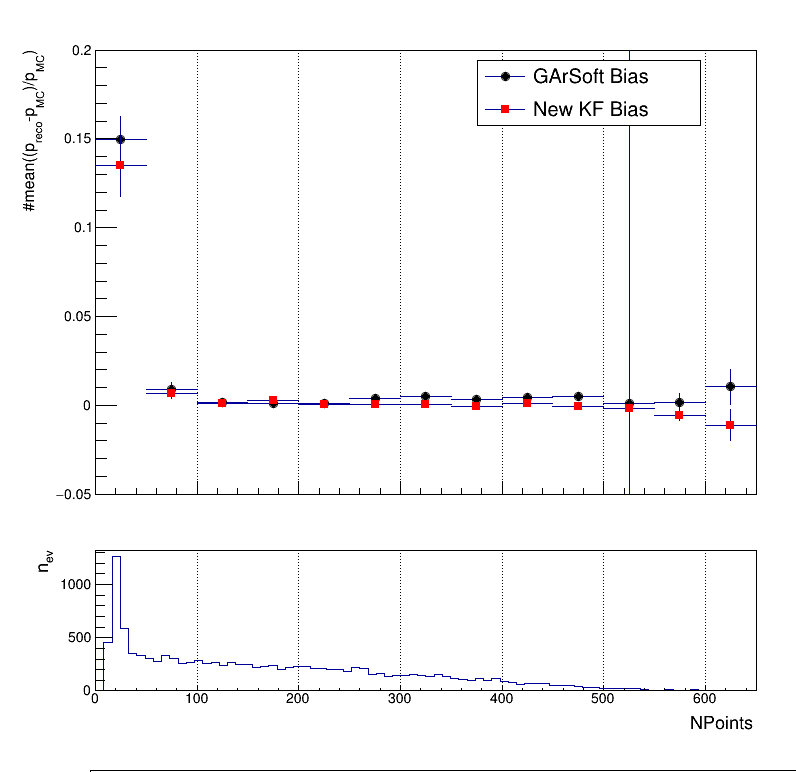

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpnpGAr_mean.Draw()
hpnpGAr_mean.GetYaxis().SetRangeUser(biasrange[0],biasrange[1])
hpnpGAr_mean.GetYaxis().SetLabelSize(0.03)
hpnpGAr_mean.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpnp_mean.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hpnpGAr_sigma,"GArSoft Bias","pl")
legend.AddEntry(hpnp_sigma,"New KF Bias","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacnp to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hnp.GetYaxis().SetTitleSize(20)
hnp.GetYaxis().SetTitleFont(43)
hnp.GetYaxis().SetTitleOffset(1.55)
hnp.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hnp.GetYaxis().SetLabelSize(15)
hnp.GetYaxis().SetNdivisions(505)

hnp.GetXaxis().SetTitleSize(20)
hnp.GetXaxis().SetTitleFont(43)
hnp.GetXaxis().SetTitleOffset(1)
hnp.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hnp.GetXaxis().SetLabelSize(15)
hnp.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVSNPoints.png")

### pT 

In [ ]:
#pTRange = "0.5,3" #Particle gun
#NBins = "10"
#biasrange = [-0.02,0.02]
pTRange = "0.0,5.5" #Interaction
NBins = "11"
biasrange = [-0.05,0.1]
tree.Draw("(part.fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/part.fParamMC[0].GetP():abs(1/part.fParamMC[0].fP[4])>>hppTGAr("+NBins+","+pTRange+",50,-0.4,0.4)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hppTGAr = ROOT.gPad.GetPrimitive("hppTGAr")
hppTGAr.FitSlicesY()
hppTGAr_sigma = ROOT.gDirectory.Get("hppTGAr_2")
hppTGAr_mean = ROOT.gDirectory.Get("hppTGAr_1")
hppTGAr_mean.SetTitle(";LArm (cm); #mu((p_{reco}-p_{MC})/p_{MC})")
#hpkGAr_sigma.SetTitle(";Length (cm); #sigma_{GAr}")

tree.Draw("(part.fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/part.fParamMC[0].GetP():abs(1/part.fParamMC[0].fP[4])>>hppT("+NBins+","+pTRange+",50,-0.4,0.4)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hppT = ROOT.gPad.GetPrimitive("hppT")
hppT.FitSlicesY()
hppT_sigma = ROOT.gDirectory.Get("hppT_2")
hppT_mean = ROOT.gDirectory.Get("hppT_1")
hppT_sigma.SetTitle(";LArm (cm); #sigma((p_{reco}-p_{MC})/p_{MC})")

tree.Draw("abs(1/part.fParamMC[0].fP[4])>>hpT(80,"+pTRange+")","part.fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hpT = ROOT.gPad.GetPrimitive("hpT")
hpT.SetTitle(";pTMC (GeV/c); n_{ev}")

hppTGAr_sigma.SetMarkerStyle(20)
hppT_sigma.SetMarkerStyle(21)
hppT_sigma.SetMarkerColor(ROOT.kRed)
hppTGAr_mean.SetMarkerStyle(20)
hppT_mean.SetMarkerStyle(21)
hppT_mean.SetMarkerColor(ROOT.kRed)

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (4.000000,4.500000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (4.500000,5.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (5.000000,5.500000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (5.500000,6.000000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::Do

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotRespVSpT.png has been created


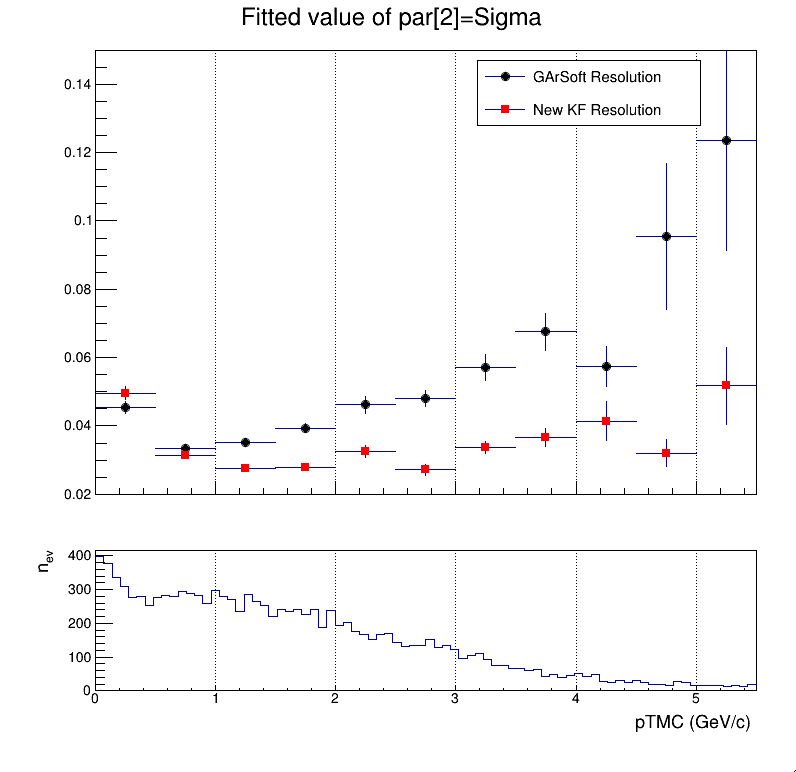

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hppTGAr_sigma.Draw()
#hppT_sigma.GetYaxis().SetRangeUser(0.014,0.034)
hppTGAr_sigma.GetYaxis().SetRangeUser(0.02,0.15)
hppTGAr_sigma.GetYaxis().SetLabelSize(0.03)
hppTGAr_sigma.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hppT_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hppTGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(hppT_sigma,"New KF Resolution","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacpT to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hpT.GetYaxis().SetTitleSize(20)
hpT.GetYaxis().SetTitleFont(43)
hpT.GetYaxis().SetTitleOffset(1.55)
hpT.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hpT.GetYaxis().SetLabelSize(15)
hpT.GetYaxis().SetNdivisions(505)

hpT.GetXaxis().SetTitleSize(20)
hpT.GetXaxis().SetTitleFont(43)
hpT.GetXaxis().SetTitleOffset(1)
hpT.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hpT.GetXaxis().SetLabelSize(15)
hpT.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"RespVSpT.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotBiaspVSpT.png has been created


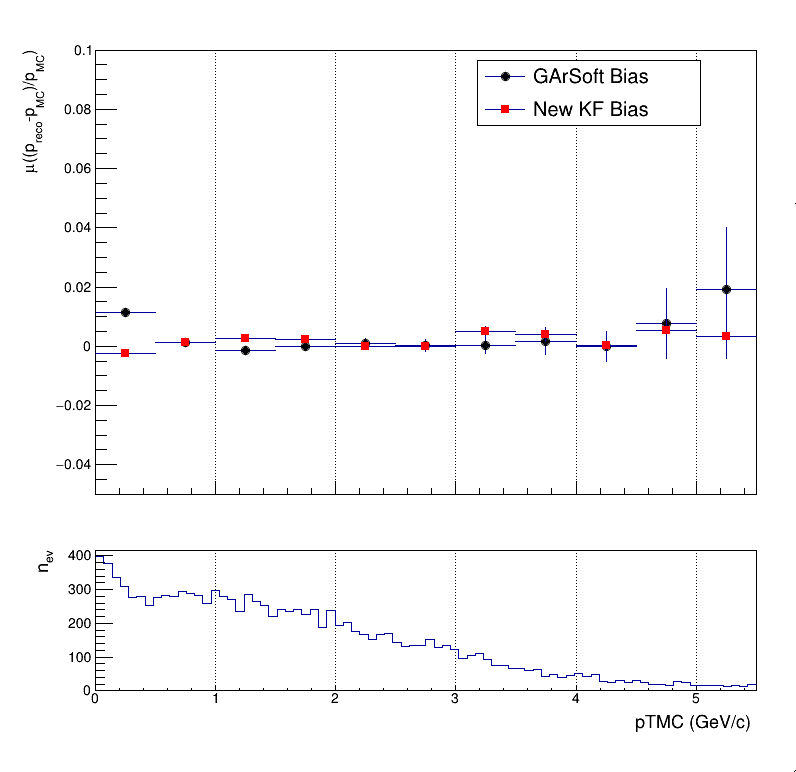

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hppTGAr_mean.Draw()
hppTGAr_mean.GetYaxis().SetRangeUser(biasrange[0],biasrange[1])
hppTGAr_mean.GetYaxis().SetLabelSize(0.03)
hppTGAr_mean.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hppT_mean.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hppTGAr_sigma,"GArSoft Bias","pl")
legend.AddEntry(hppT_sigma,"New KF Bias","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacpT to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hpT.GetYaxis().SetTitleSize(20)
hpT.GetYaxis().SetTitleFont(43)
hpT.GetYaxis().SetTitleOffset(1.55)
hpT.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hpT.GetYaxis().SetLabelSize(15)
hpT.GetYaxis().SetNdivisions(505)

hpT.GetXaxis().SetTitleSize(20)
hpT.GetXaxis().SetTitleFont(43)
hpT.GetXaxis().SetTitleOffset(1)
hpT.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hpT.GetXaxis().SetLabelSize(15)
hpT.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVSpT.png")

## 1/pT

In [ ]:
#pTRange = "0.5,3" #Particle gun
#NBins = "10"
#biasrange = [-0.02,0.02]
pTRange = "0,3.5" #Interaction
NBins = "7"
biasrange = [-0.05,0.1]
tree.Draw("(part.fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/part.fParamMC[0].GetP():abs(part.fParamMC[0].fP[4])>>hppTGAr("+NBins+","+pTRange+",100,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&part.fParamMC[0].fP[4]!=0","colz")
hppTGAr = ROOT.gPad.GetPrimitive("hppTGAr")
hppTGAr.FitSlicesY()
hppTGAr_sigma = ROOT.gDirectory.Get("hppTGAr_2")
hppTGAr_mean = ROOT.gDirectory.Get("hppTGAr_1")
hppTGAr_mean.SetTitle(";LArm (cm); #mu((p_{reco}-p_{MC})/p_{MC})")
#hpkGAr_sigma.SetTitle(";Length (cm); #sigma_{GAr}")

tree.Draw("(part.fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/part.fParamMC[0].GetP():abs(part.fParamMC[0].fP[4])>>hppT("+NBins+","+pTRange+",100,-0.3,0.3)","fParam"+ParamType+"[0].fC[14]!=0&&part.fParamMC[0].fP[4]!=0","colz")
hppT = ROOT.gPad.GetPrimitive("hppT")
hppT.FitSlicesY()
hppT_sigma = ROOT.gDirectory.Get("hppT_2")
hppT_mean = ROOT.gDirectory.Get("hppT_1")
hppT_sigma.SetTitle(";LArm (cm); #sigma((p_{reco}-p_{MC})/p_{MC})")

tree.Draw("abs(1/part.fParamMC[0].fP[4])>>hpT(80,"+pTRange+")","part.fParam"+ParamType+"[0].fC[14]!=0&&part.fParamMC[0].fP[4]!=0","colz")
hpT = ROOT.gPad.GetPrimitive("hpT")
hpT.SetTitle(";pTMC (GeV/c); n_{ev}")

hppTGAr_sigma.SetMarkerStyle(20)
hppT_sigma.SetMarkerStyle(21)
hppT_sigma.SetMarkerColor(ROOT.kRed)
hppTGAr_mean.SetMarkerStyle(20)
hppT_mean.SetMarkerStyle(21)
hppT_mean.SetMarkerColor(ROOT.kRed)

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFit

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotRespVSinvpT.png has been created


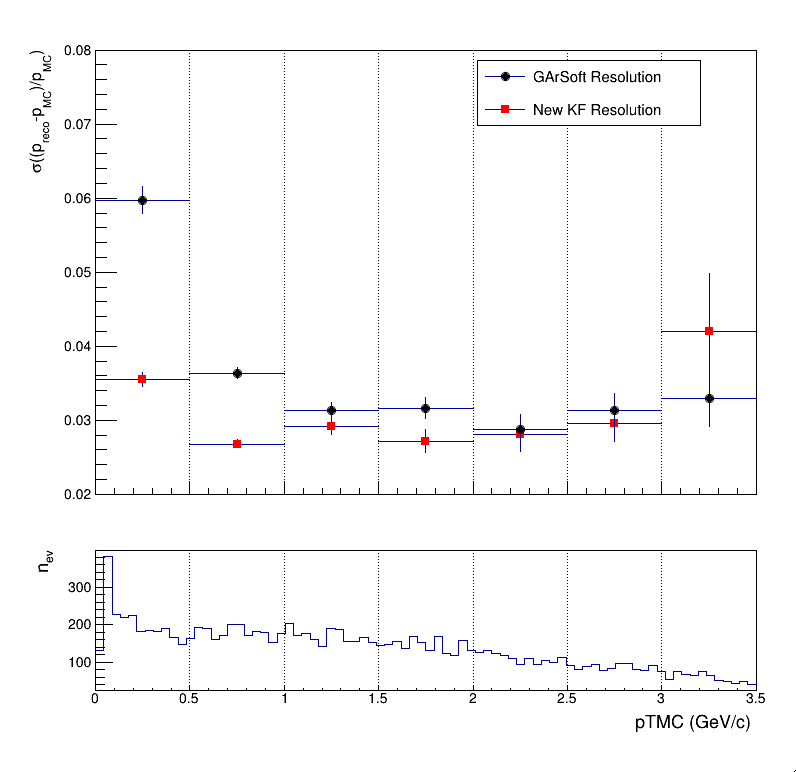

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hppT_sigma.Draw()
hppT_sigma.GetYaxis().SetRangeUser(0.02,0.08)
hppT_sigma.GetYaxis().SetLabelSize(0.03)
hppT_sigma.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hppTGAr_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hppTGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(hppT_sigma,"New KF Resolution","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacpT to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hpT.GetYaxis().SetTitleSize(20)
hpT.GetYaxis().SetTitleFont(43)
hpT.GetYaxis().SetTitleOffset(1.55)
hpT.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hpT.GetYaxis().SetLabelSize(15)
hpT.GetYaxis().SetNdivisions(505)

hpT.GetXaxis().SetTitleSize(20)
hpT.GetXaxis().SetTitleFont(43)
hpT.GetXaxis().SetTitleOffset(1)
hpT.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hpT.GetXaxis().SetLabelSize(15)
hpT.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"RespVSinvpT.png")

### Total momentum

In [ ]:
# ptotRange = "0.5,3" #particle gun
# NBins = "25"
# biasrange = [-0.02,0.02]
biasrange =[-0.05,0.1]
ptotRange = "0,5.5" #Interaction
NBins = "11"
tree.Draw("(part.fParamMC[0].GetP()-paramSt"+ParamStType+".GetP())/part.fParamMC[0].GetP():part.fParamMC[0].GetP()>>hpptotGAr("+NBins+","+ptotRange+",50,-0.5,0.5)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hpptotGAr = ROOT.gPad.GetPrimitive("hpptotGAr")
hpptotGAr.FitSlicesY()
hpptotGAr_sigma = ROOT.gDirectory.Get("hpptotGAr_2")
hpptotGAr_mean = ROOT.gDirectory.Get("hpptotGAr_1")
hpptotGAr_mean.SetTitle(";LArm (cm); #mu((p_{reco}-p_{MC})/p_{MC})")
#hpkGAr_sigma.SetTitle(";Length (cm); #sigma_{GAr}")

tree.Draw("(part.fParamMC[0].GetP()-fParam"+ParamType+"[0].GetP())/part.fParamMC[0].GetP():part.fParamMC[0].GetP()>>hpptot("+NBins+","+ptotRange+",50,-0.5,0.5)","fParam"+ParamType+"[0].fC[14]!=0&&fParamMC[0].fP[4]!=0","colz")
hpptot = ROOT.gPad.GetPrimitive("hpptot")
hpptot.FitSlicesY()
hpptot_sigma = ROOT.gDirectory.Get("hpptot_2")
hpptot_mean = ROOT.gDirectory.Get("hpptot_1")
hpptot_sigma.SetTitle(";LArm (cm); #sigma((p_{reco}-p_{MC})/p_{MC})")

tree.Draw("part.fParamMC[0].GetP()>>hptot(80,"+ptotRange+")","part.fParam"+ParamType+"[0].fC[14]!=0","colz")
hptot = ROOT.gPad.GetPrimitive("hptot")
hptot.SetTitle(";ptotMC (GeV/c); n_{ev}")

hpptotGAr_sigma.SetMarkerStyle(20)
hpptot_sigma.SetMarkerStyle(21)
hpptot_sigma.SetMarkerColor(ROOT.kRed)
hpptotGAr_mean.SetMarkerStyle(20)
hpptot_mean.SetMarkerStyle(21)
hpptot_mean.SetMarkerColor(ROOT.kRed)

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (4.000000,4.500000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (4.500000,5.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (5.000000,5.500000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (5.500000,6.000000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::Do

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotRespVSptot.png has been created


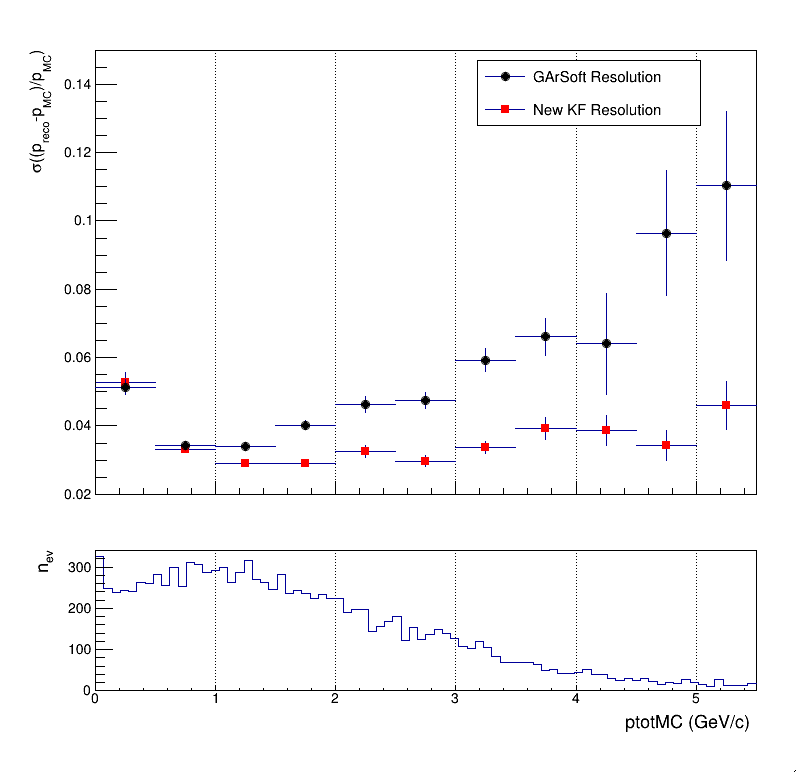

In [ ]:
#ROOT.gStyle.SetOptotStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpptot_sigma.Draw()
hpptot_sigma.GetYaxis().SetRangeUser(0.02,0.15)
hpptot_sigma.GetYaxis().SetLabelSize(0.03)
hpptot_sigma.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpptotGAr_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hpptotGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(hpptot_sigma,"New KF Resolution","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacptot to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hptot.GetYaxis().SetTitleSize(20)
hptot.GetYaxis().SetTitleFont(43)
hptot.GetYaxis().SetTitleOffset(1.55)
hptot.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hptot.GetYaxis().SetLabelSize(15)
hptot.GetYaxis().SetNdivisions(505)

hptot.GetXaxis().SetTitleSize(20)
hptot.GetXaxis().SetTitleFont(43)
hptot.GetXaxis().SetTitleOffset(1)
hptot.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hptot.GetXaxis().SetLabelSize(15)
hptot.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"RespVSptot.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotBiaspVSptot.png has been created


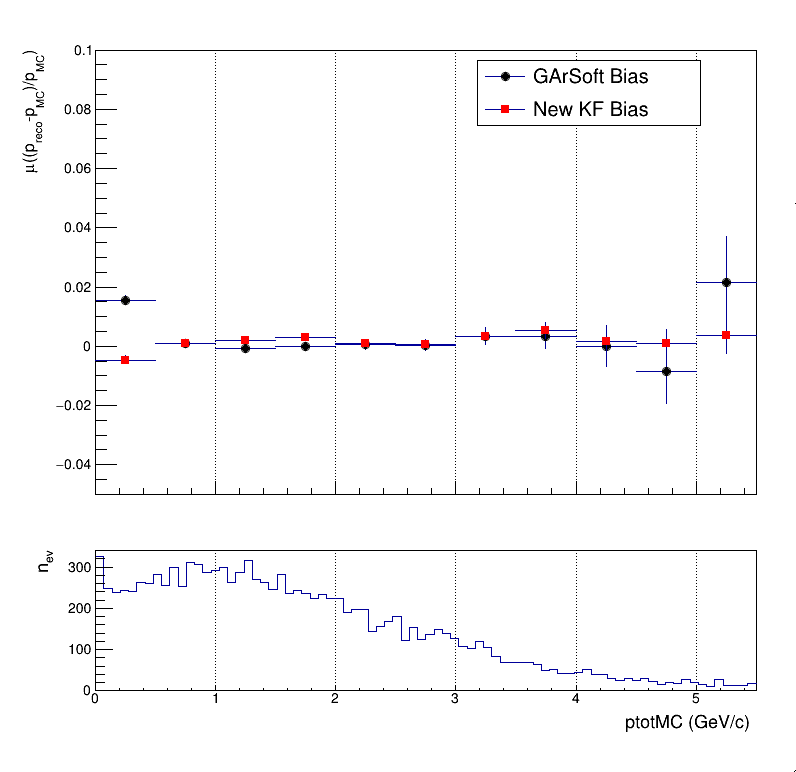

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
hpptotGAr_mean.Draw()
hpptotGAr_mean.GetYaxis().SetRangeUser(biasrange[0],biasrange[1])
hpptotGAr_mean.GetYaxis().SetLabelSize(0.03)
hpptotGAr_mean.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

hpptot_mean.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
legend.AddEntry(hpptotGAr_sigma,"GArSoft Bias","pl")
legend.AddEntry(hpptot_sigma,"New KF Bias","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacptot to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hptot.GetYaxis().SetTitleSize(20)
hptot.GetYaxis().SetTitleFont(43)
hptot.GetYaxis().SetTitleOffset(1.55)
hptot.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hptot.GetYaxis().SetLabelSize(15)
hptot.GetYaxis().SetNdivisions(505)

hptot.GetXaxis().SetTitleSize(20)
hptot.GetXaxis().SetTitleFont(43)
hptot.GetXaxis().SetTitleOffset(1)
hptot.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hptot.GetXaxis().SetLabelSize(15)
hptot.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVSptot.png")

## Unit Test

### Seed


 FCN=1986.92 FROM MIGRAD    STATUS=CONVERGED     102 CALLS         103 TOTAL
                     EDM=5.91194e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.49538e+02   1.41198e+01   1.66113e-01   3.39985e-05
   2  Mean         2.12724e-02   6.28010e-03   1.36598e-04   2.45326e-02
   3  Sigma        6.16352e-01   9.76430e-03   4.61853e-05   1.43229e-01
 FCN=1895.57 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=4.4741e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.66024e+02   6.60178e+00   6.82246e-02  -6.35637e-05
   2  Mean         3.63463e-02   1.00916e-02  -4.28403e-05   2.54262e-02
   3  Sigma        9.

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeed2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeed3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeed4.png has been created


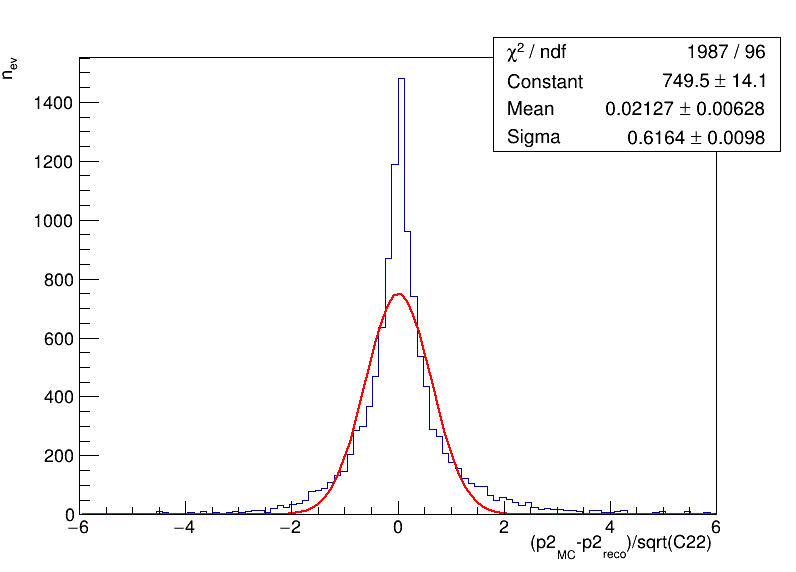

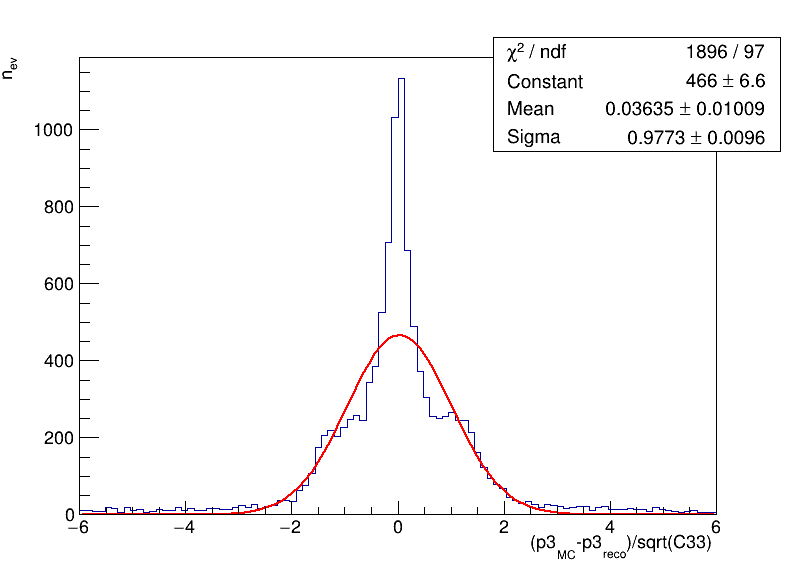

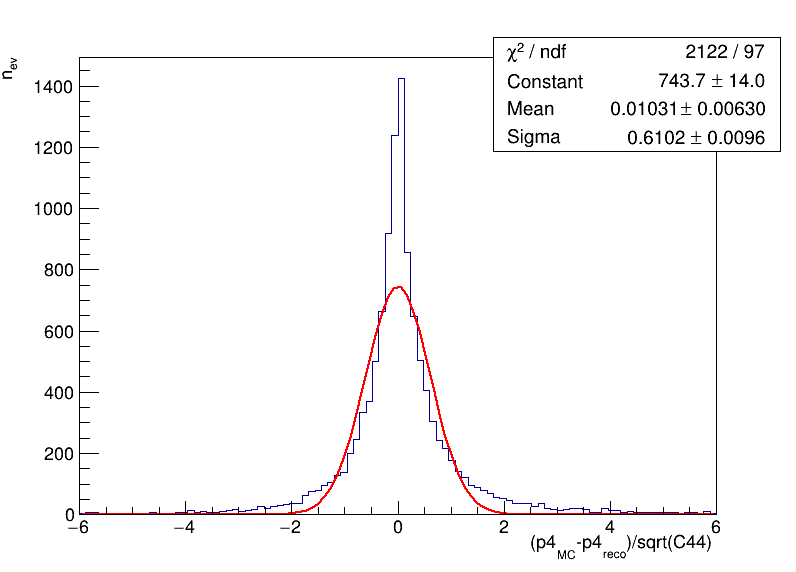

In [ ]:

cseed2 = ROOT.TCanvas("cseed2","cseed2",800,600)
tree.SetAlias("unitSeed2","(part.fParamInRot[part.fParamInRot@.size()-1].fP[2]-part.fParamMC[part.fParamInRot@.size()-1].fP[2])/sqrt(part.fParamInRot[part.fParamInRot@.size()-1].fC[5]*0.5)")
tree.Draw("unitSeed2>>htempseed2(100,-6,6)","")
hseed2 = ROOT.gPad.GetPrimitive("htempseed2")
hseed2.SetTitle(";(p2_{MC}-p2_{reco})/sqrt(C22); n_{ev}")
hseed2.Fit("gaus")
hseed2.Draw()
cseed2.Draw()
cseed2.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeed2.png")


cseed3 = ROOT.TCanvas("cseed3","cseed3",800,600)
tree.SetAlias("unitSeed3","(part.fParamInRot[part.fParamInRot@.size()-1].fP[3]-part.fParamMC[part.fParamInRot@.size()-1].fP[3])/sqrt(part.fParamInRot[part.fParamInRot@.size()-1].fC[9]*0.5)")
tree.Draw("unitSeed3>>htempseed3(100,-6,6)","")
hseed3 = ROOT.gPad.GetPrimitive("htempseed3")
hseed3.SetTitle(";(p3_{MC}-p3_{reco})/sqrt(C33); n_{ev}")
hseed3.Fit("gaus")
hseed3.Draw()
cseed3.Draw()
cseed3.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeed3.png")


cseed4 = ROOT.TCanvas("cseed4","cseed4",800,600)
tree.SetAlias("unitSeed4","(part.fParamInRot[part.fParamInRot@.size()-1].fP[4]-part.fParamMC[part.fParamInRot@.size()-1].fP[4])/sqrt(part.fParamInRot[part.fParamInRot@.size()-1].fC[14]*0.5)")
tree.Draw("unitSeed4>>htempseed4(100,-6,6)","")
hseed4 = ROOT.gPad.GetPrimitive("htempseed4")
hseed4.SetTitle(";(p4_{MC}-p4_{reco})/sqrt(C44); n_{ev}")
hseed4.Fit("gaus")
hseed4.Draw()
cseed4.Draw()
cseed4.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeed4.png")

#### Seed VS LArm

In [ ]:
tree.Draw("unitSeed4:lArmMC>>huseed4la(9,"+LArmRange+",100,-5,5)","","colz")
huseed4la = ROOT.gPad.GetPrimitive("huseed4la")
huseed4la.FitSlicesY()
huseed4la_sigma = ROOT.gDirectory.Get("huseed4la_2")
huseed4la_mean = ROOT.gDirectory.Get("huseed4la_1")
huseed4la_sigma.SetTitle(";LArm (cm); #sigma(UnitSeed)")
huseed4la_mean.SetTitle(";LArm (cm); #mu(UnitSeed)")

tree.Draw("unitSeed3:lArmMC>>huseed3la(9,"+LArmRange+",100,-5,5)","","colz")
huseed3la = ROOT.gPad.GetPrimitive("huseed3la")
huseed3la.FitSlicesY()
huseed3la_sigma = ROOT.gDirectory.Get("huseed3la_2")
huseed3la_mean = ROOT.gDirectory.Get("huseed3la_1")
huseed3la_sigma.SetTitle(";LArm (cm); #sigma(UnitSeed)")
huseed3la_mean.SetTitle(";LArm (cm); #mu(UnitSeed)")

tree.Draw("unitSeed2:lArmMC>>huseed2la(9,"+LArmRange+",100,-5,5)","","colz")
huseed2la = ROOT.gPad.GetPrimitive("huseed2la")
huseed2la.FitSlicesY()
huseed2la_sigma = ROOT.gDirectory.Get("huseed2la_2")
huseed2la_mean = ROOT.gDirectory.Get("huseed2la_1")
huseed2la_sigma.SetTitle(";LArm (cm); #sigma(UnitSeed)")
huseed2la_mean.SetTitle(";LArm (cm); #mu(UnitSeed)")


huseed2la_sigma.SetMarkerStyle(20)

huseed3la_sigma.SetMarkerStyle(21)
huseed3la_sigma.SetMarkerColor(ROOT.kRed)

huseed4la_sigma.SetMarkerStyle(22)
huseed4la_sigma.SetMarkerColor(ROOT.kBlue)

Info in <TH2F::DoFitSlices>: Slice fit 0 (-25.000000,25.000000)
Info in <TH2F::DoFitSlices>: Slice fit 1 (25.000000,75.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (75.000000,125.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (125.000000,175.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (175.000000,225.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (225.000000,275.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (275.000000,325.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (325.000000,375.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (375.000000,425.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (425.000000,475.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (475.000000,525.000000)
Info in <TH2F::DoFitSlices>: Slice fit 0 (-25.000000,25.000000)
Info in <TH2F::DoFitSlices>: Slice fit 1 (25.000000,75.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (75.000000,125.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (125.000000,175.000000)
Info in <TH2F::DoFitSlices>: Sli

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqq
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeedVsLArm.png has been created


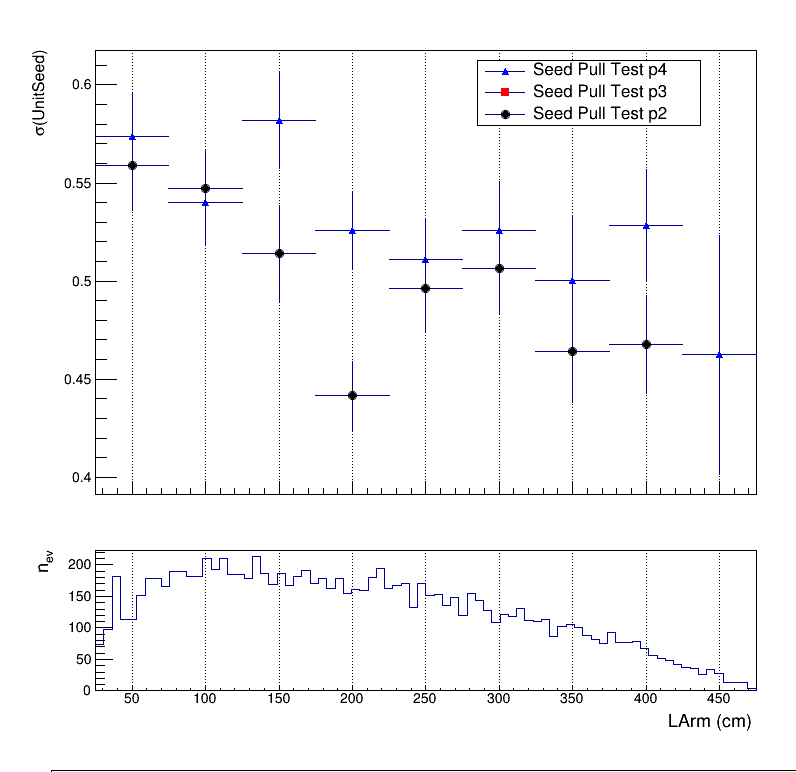

In [ ]:
ROOT.gStyle.SetOptStat(0)
hqq = ROOT.TCanvas("hqq","hqq",800,800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.35, 1, 1.0)
pad1.SetBottomMargin(0.015); # Upper and lower plot are joined
pad1.SetRightMargin(0.05); # Upper and lower plot are joined
pad1.SetLeftMargin(0.12); # Upper and lower plot are joined
pad1.SetGridx();         # Vertical grid
pad1.Draw();             # Draw the upper pad: pad1
pad1.cd();               # pad1 becomes the current pad
huseed4la_sigma.Draw()
huseed4la_sigma.GetYaxis().SetLabelSize(0.03)
huseed4la_sigma.GetXaxis().SetLabelSize(0.0)
axis = ROOT.TGaxis( -5, 20, -5, 220, 20,220,510,"")
axis.SetLabelFont(43) # Absolute font size in pixel (precision 3)
axis.SetLabelSize(15)
axis.Draw()

huseed3la_sigma.Draw("same")
huseed2la_sigma.Draw("same")
legend = ROOT.TLegend(0.6,0.75,0.88,0.88)
#legend.SetBorderSize(0)
#legend.AddEntry(hplaGAr_sigma,"GArSoft Resolution","pl")
legend.AddEntry(huseed4la_sigma,"Seed Pull Test p4","pl")
legend.AddEntry(huseed3la_sigma,"Seed Pull Test p3","pl")
legend.AddEntry(huseed2la_sigma,"Seed Pull Test p2","pl")
legend.Draw()
hqq.Draw()

hqq.cd();          # Go bacla to the main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.22)
pad2.SetRightMargin(0.05); # Upper and lower plot are joined
pad2.SetLeftMargin(0.12); # Upper and lower plot are joined
pad2.SetGridx() # vertical grid
pad2.Draw()
pad2.cd();       # pad2 becomes the current pad

hla.GetYaxis().SetTitleSize(20)
hla.GetYaxis().SetTitleFont(43)
hla.GetYaxis().SetTitleOffset(1.55)
hla.GetYaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hla.GetYaxis().SetLabelSize(15)
hla.GetYaxis().SetNdivisions(505)

hla.GetXaxis().SetTitleSize(20)
hla.GetXaxis().SetTitleFont(43)
hla.GetXaxis().SetTitleOffset(1)
hla.GetXaxis().SetLabelFont(43) # Absolute font size in pixel (precision 3)
hla.GetXaxis().SetLabelSize(15)
hla.Draw()
hqq.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeedVsLArm.png")

### Kalman Filter

 FCN=969.933 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=1.11643e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.34169e+02   6.57105e+00   6.49170e-02   3.99138e-06
   2  Mean         1.41504e-02   1.12368e-02   1.70702e-04   3.99777e-02
   3  Sigma        1.14157e+00   1.31341e-02   3.22498e-05  -4.67845e-02
 FCN=999.239 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=1.65664e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.11655e+02   6.16529e+00   6.25891e-02   1.08581e-05
   2  Mean         1.55123e-01   1.20628e-02   1.82400e-04   4.00386e-02
   3  Sigma        1.19955e+00   

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitKF2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitKF3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitKF4.png has been created


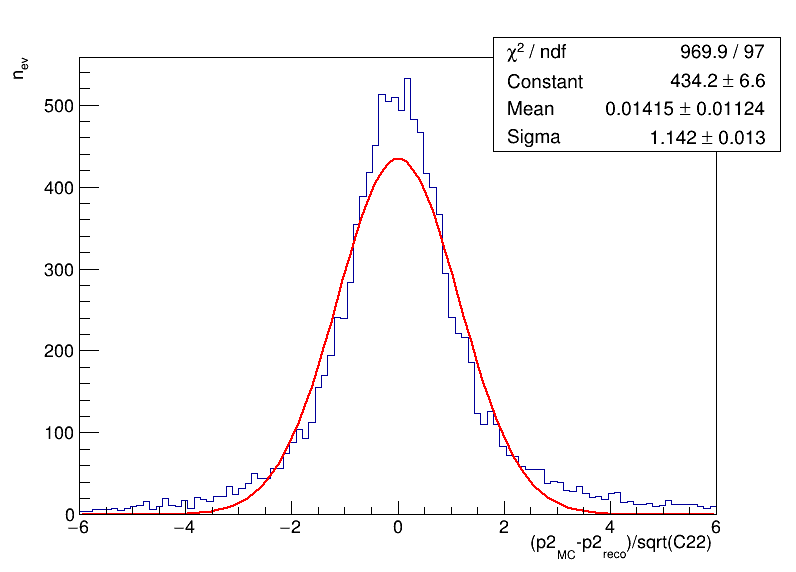

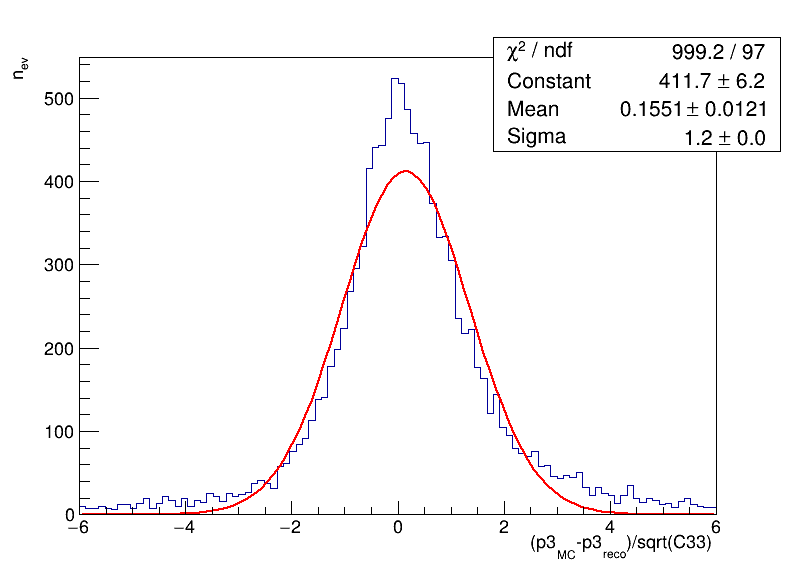

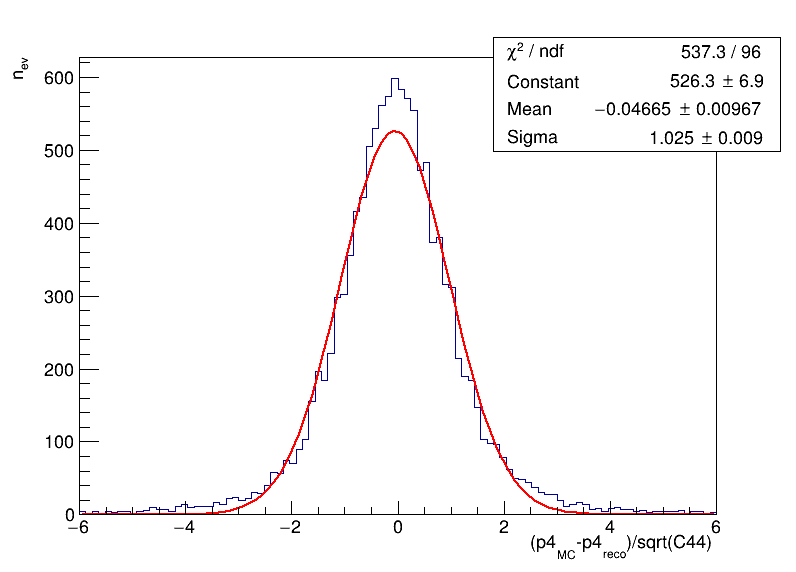

In [ ]:
cu2 = ROOT.TCanvas("cu2","cu2",800,600)
tree.Draw("(part.fParamInRot[0].fP[2]-part.fParamMC[0].fP[2])/sqrt(part.fParamInRot[0].fC[5])>>htempu2(100,-6,6)","part.fParamInRot[0].fC[5]!=0&&fParamMC[0].fP[4]!=0")
hu2 = ROOT.gPad.GetPrimitive("htempu2")
hu2.SetTitle(";(p2_{MC}-p2_{reco})/sqrt(C22); n_{ev}")
hu2.Fit("gaus")
hu2.Draw()
cu2.Draw()
cu2.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitKF2.png")

cu3 = ROOT.TCanvas("cu3","cu3",800,600)
tree.Draw("(part.fParamInRot[0].fP[3]-part.fParamMC[0].fP[3])/sqrt(part.fParamInRot[0].fC[9])>>htempu3(100,-6,6)","part.fParamInRot[0].fC[9]!=0&&fParamMC[0].fP[4]!=0")
hu3 = ROOT.gPad.GetPrimitive("htempu3")
hu3.SetTitle(";(p3_{MC}-p3_{reco})/sqrt(C33); n_{ev}")
hu3.Fit("gaus")
hu3.Draw()
cu3.Draw()
cu3.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitKF3.png")

cu4 = ROOT.TCanvas("cu4","cu4",800,600)
tree.Draw("(part.fParamInRot[0].fP[4]-part.fParamMC[0].fP[4])/sqrt(part.fParamInRot[0].fC[14])>>htempu4(100,-6,6)","part.fParamInRot[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
hu4 = ROOT.gPad.GetPrimitive("htempu4")
hu4.SetTitle(";(p4_{MC}-p4_{reco})/sqrt(C44); n_{ev}")
hu4.Fit("gaus")
hu4.Draw()
cu4.Draw()
cu4.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitKF4.png")